### EDA and Statistical Analysis of FIFA Case Study

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

# Part A:

The following are the BMI of 50 young adults:

17.5,18.0, 36.8, 31.7, 31.7, 17.3, 24.3, 47.7, 38.5, 17.0, 23.7, 16.5, 25.1, 17.4, 18.0, 37.6, 19.7, 21.4, 28.6, 21.6, 19.3, 20.0, 16.9, 25.2, 19.8, 25.0, 17.2, 20.4, 20.1, 29.1, 19.1, 25.2, 23.2, 25.9, 24.0, 41.7, 24.0, 16.8, 26.8, 31.4, 16.9, 17.2, 24.1, 35.2, 19.1, 22.9, 18.2, 25.4, 35.4, 25.5

**Q1. Compute the mean, median and the mode of the data**

In [2]:
BMI = pd.Series([17.5,18.0, 36.8, 31.7, 31.7, 17.3, 24.3, 47.7, 38.5, 17.0, 23.7, 16.5, 25.1, 17.4, 18.0, 37.6, 19.7, 21.4, 28.6, 21.6, 19.3, 20.0, 16.9, 25.2, 19.8, 25.0, 17.2, 20.4, 20.1, 29.1, 19.1, 25.2, 23.2, 25.9, 24.0, 41.7, 24.0, 16.8, 26.8, 31.4, 16.9, 17.2, 24.1, 35.2, 19.1, 22.9, 18.2, 25.4, 35.4, 25.5])

In [3]:
print('Mean of data',BMI.mean())
print('Median of data',BMI.median())
print('Mode of data',BMI.mode())

Mean of data 24.422000000000008
Median of data 23.45
Mode of data 0    16.9
1    17.2
2    18.0
3    19.1
4    24.0
5    25.2
6    31.7
dtype: float64


**Q2. Compute the range , variance and standard deviation of BMI**

In [4]:
BMI_Range = BMI.max()-BMI.min()
print('Range of data',BMI_Range)
print('Variance of data',BMI.var())
print('Standard Deviation of data',BMI.std())

Range of data 31.200000000000003
Variance of data 54.56093469387753
Standard Deviation of data 7.3865373954159015


**Q3. Find the mean deviation for the data**

In [5]:
X_bar = BMI.mean()
n = len(BMI)
print(X_bar,"and",n)

24.422000000000008 and 50


In [6]:
# since mean deviation = sum(abs(i-X_bar)/n)
mean_deviation = sum(abs(BMI-X_bar)/n)
mean_deviation

5.642400000000005

**alternative method**

In [7]:
lst_mean_dev = []
for i in BMI: 
    mean_deviation_val = abs(i-X_bar)/n
    lst_mean_dev.append(mean_deviation_val)
print(lst_mean_dev)

[0.13844000000000015, 0.12844000000000017, 0.24755999999999978, 0.14555999999999983, 0.14555999999999983, 0.14244000000000015, 0.00244000000000014, 0.4655599999999999, 0.28155999999999987, 0.14844000000000016, 0.014440000000000168, 0.15844000000000016, 0.013559999999999874, 0.14044000000000018, 0.12844000000000017, 0.26355999999999985, 0.09444000000000016, 0.06044000000000018, 0.08355999999999987, 0.05644000000000013, 0.10244000000000014, 0.08844000000000016, 0.15044000000000018, 0.015559999999999831, 0.09244000000000013, 0.011559999999999846, 0.14444000000000018, 0.08044000000000018, 0.08644000000000013, 0.09355999999999988, 0.10644000000000013, 0.015559999999999831, 0.02444000000000017, 0.02955999999999982, 0.008440000000000154, 0.3455599999999999, 0.008440000000000154, 0.15244000000000013, 0.04755999999999986, 0.13955999999999982, 0.15044000000000018, 0.14444000000000018, 0.006440000000000125, 0.2155599999999999, 0.10644000000000013, 0.030440000000000182, 0.12444000000000016, 0.0195

In [8]:
Mean_Deviation = sum(lst_mean_dev)
Mean_Deviation

5.642400000000005

**Q4. Calculate the Pearson coefficient of skewness and comment on the 
skewness of the data** 


[A measure to determine the skewness of a distribution is called the Pearson 
coefficient of skewness.]

The value of the coefficient if skewness usually ranges from –3 to 3. When the 
distribution is symmetric, the coefficient is zero; when the distribution is 
positively skewed , the coefficient is positive, and when the distribution is 
negatively skewed the coefficient is negative.


In [9]:
skewness_value = 3*(BMI.mean()-BMI.median())/BMI.std()
skewness_value

0.3947722517196894

In [10]:
def Pearson_Coefficient(x):
    if x==0:
        return ('Symmetric')
    elif -3<x<0:
        return ('Negatively Skewed')
    else:
        return ('Positively Skewed')

In [11]:
Pearson_Coefficient(skewness_value)

'Positively Skewed'

**Q5. Count the number of data values that fall within one standard deviation of 
the mean. Compare this with the answer from Chebyshev’s Theorem.**

In [391]:
data = bmi_df[(bmi_df['bmi']>(bmi_df['bmi'].mean()-bmi_df['bmi'].std())) & (bmi_df['bmi']<(bmi_df['bmi'].mean()+bmi_df['bmi'].std()))]
len(data)

38

In [392]:
data

,bmi,pct_rank
0,17.5,0.20
1,18.0,0.23
3,31.7,0.85
4,31.7,0.85
5,17.3,0.16
6,24.3,0.60
10,23.7,0.52
12,25.1,0.64
13,17.4,0.18
14,18.0,0.23


**Q6. Find the three quartiles and the interquartile range (IQR).**

In [12]:
q1 = BMI.quantile(0.25)
q2 = BMI.quantile(0.50)
q3 = BMI.quantile(0.75)

print(" The first quantile is:",q1)
print(" The second quantile is:",q2)
print(" The third quantile is:",q3)

 The first quantile is: 18.425
 The second quantile is: 23.45
 The third quantile is: 26.575


In [13]:
# Inter-quartile range:
IQR = q3-q1

print("InterQuartile range is:",IQR)

InterQuartile range is: 8.149999999999999


**Q7. Are there any outliers in the data set ?**

In [14]:
# we can find the outliers in the data using upper-limit and lower-limit

lower_limit = q1-(1.5*IQR)
upper_limit = q3+(1.5*IQR)

Outliers = BMI[~((BMI>lower_limit)&(BMI<upper_limit))]
Outliers

7     47.7
35    41.7
dtype: float64

In [15]:
# yes there are 2 outliers present in the data 41.7 and 47.7

**Q8. Draw a boxplot of the dataset to confirm .**

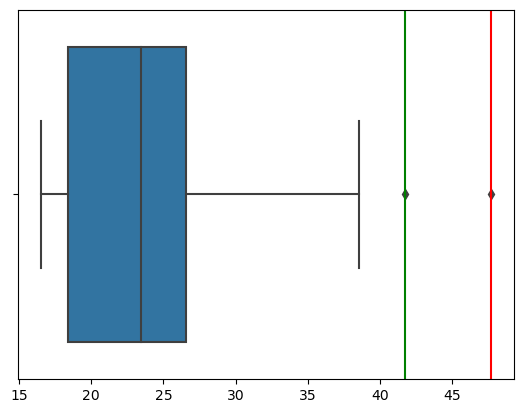

In [16]:
sns.boxplot(BMI)
plt.axvline(Outliers[7],color='r')
plt.axvline(Outliers[35],color='g')

plt.show()

**Q9. Find the percentile rank of the datapoint 25.0.**

In [17]:
bmi_df = pd.DataFrame(BMI,columns=['bmi'])
bmi_df.head()

,bmi
0,17.5
1,18.0
2,36.8
3,31.7
4,31.7


In [18]:
bmi_df['pct_rank'] = bmi_df['bmi'].rank(pct=True)
bmi_df.head()

,bmi,pct_rank
0,17.5,0.20
1,18.0,0.23
2,36.8,0.92
3,31.7,0.85
4,31.7,0.85


In [19]:
bmi_df[bmi_df['bmi']==25]

,bmi,pct_rank
25,25.0,0.62


**Q10. What is the probability that a young adult has a BMI above 25.0?**

In [20]:
# since percentile rank of a data point tells us the probability of data upto that data point
# we can use same logic to find probability of data above that data point

In [21]:
percentile_rank = bmi_df.pct_rank[25]
percentile_rank

0.62

In [22]:
prob_abv_25 = 1 - percentile_rank
prob_abv_25

0.38

**alternate method**

In [23]:
bmi_abv_25 = bmi_df[bmi_df['bmi']>25]
bmi_abv_25

,bmi,pct_rank
2,36.8,0.92
3,31.7,0.85
4,31.7,0.85
7,47.7,1.00
8,38.5,0.96
12,25.1,0.64
15,37.6,0.94
18,28.6,0.78
23,25.2,0.67
29,29.1,0.80


In [24]:
prob = len(bmi_abv_25)/len(BMI)
prob

0.38

**Q11. Create a frequency distribution for the data and visualize it appropriately**

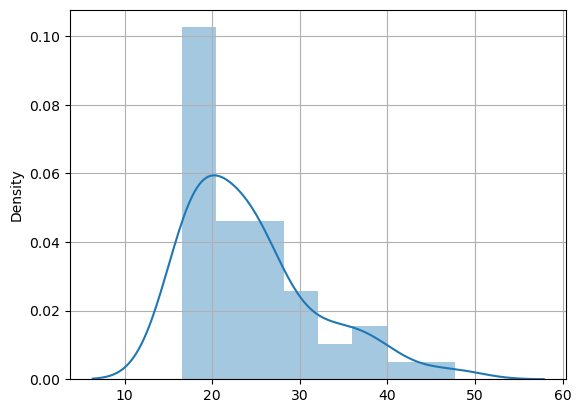

In [25]:
sns.distplot(BMI)
plt.grid()
plt.show()

**Q12. Create a probability distribution of the data and visualize it appropriately.**

Skewness of data is 0    1.209884
dtype: float64


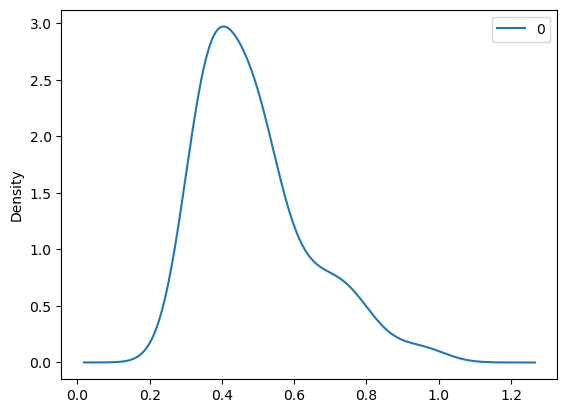

In [26]:
pd.DataFrame(BMI/len(BMI)).plot(kind='kde')
print('Skewness of data is',pd.DataFrame(BMI).skew())

<AxesSubplot:ylabel='Density'>

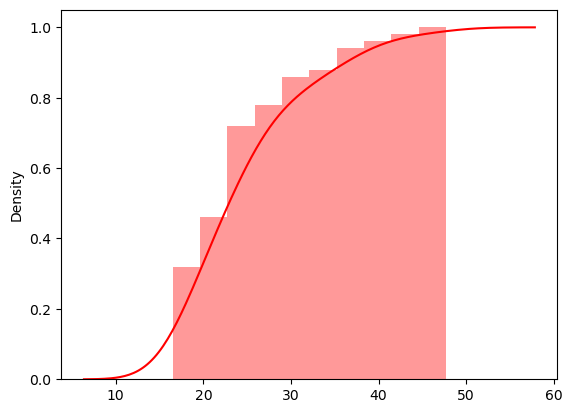

In [27]:
sns.distplot(BMI,bins=10,kde=True,color='red',hist_kws=dict(cumulative=True),kde_kws=dict(cumulative=True))

**Q13. What is the shape of the distribution of this dataset? Create an 
appropriate graph to determine that. Take 100 random samples with 
replacement from this dataset of size 5 each. Create a sampling distribution of 
the mean age of customers. Compare with other sampling distributions of 
sample size 10, 15, 20, 25, 30. State your observations. Does it corroborate 
the Central Limit Theorem?**

In [28]:
## The shape of the distribution of this dataset can be determined by creating a histogram of the data.
## The histogram will show the frequency of data points in different ranges, or bins, of the data.

In [380]:
df.shape

(13657, 42)

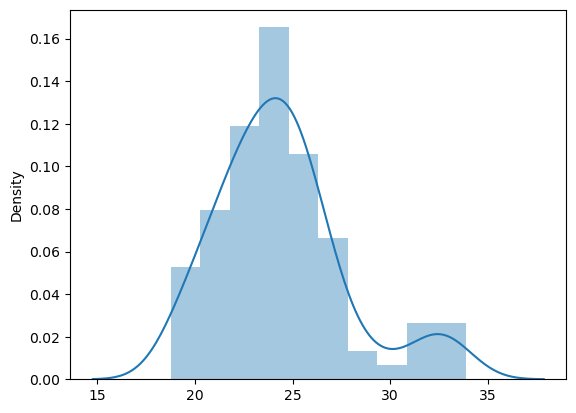

In [382]:
np.random.seed(1)
mean_ = []

for i in range(100):
    a = np.mean(np.random.choice(BMI,5))
    mean_.append(a)
    
sns.distplot(mean_)
plt.show()

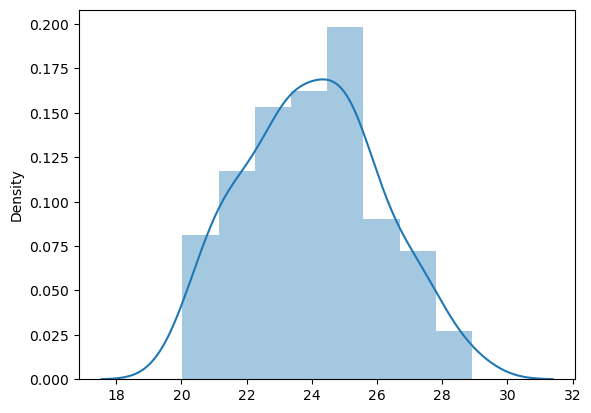

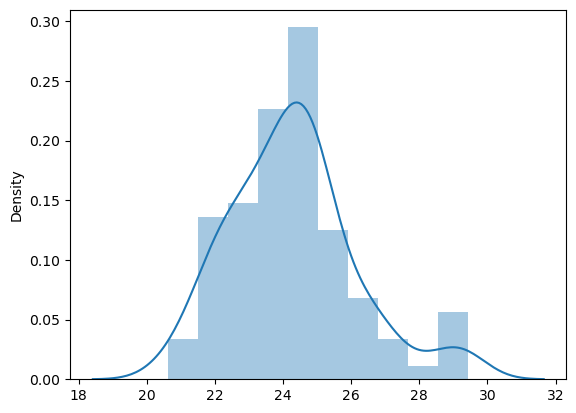

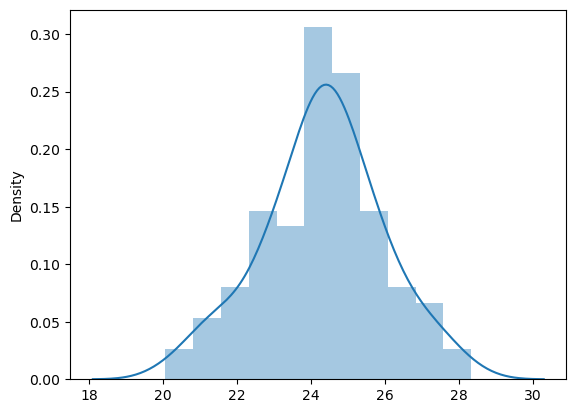

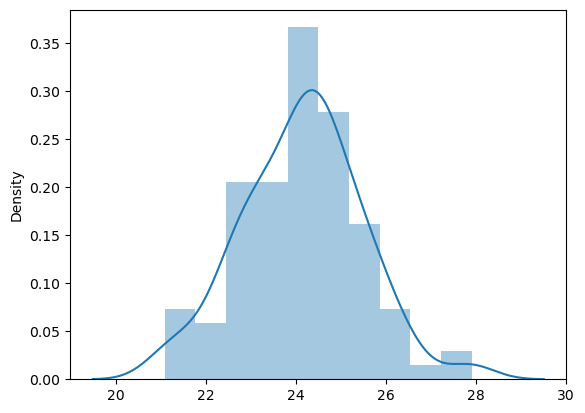

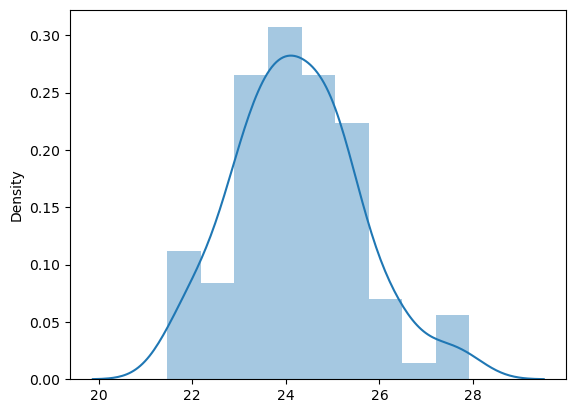

In [383]:
np.random.seed(2)
for j in (10, 15, 20, 25, 30):
    mean_1 = []

    for i in range(100):
        a = np.mean(np.random.choice(BMI,j))
        mean_1.append(a)

    sns.distplot(mean_1)
    plt.show()

In [ ]:
# yes it's collebrating the central limit theorem becoz 
#if the sample size increases the data will be normal and  symetrical too

In [384]:
import random

In [389]:
sample_mean = []
for i in (5,10,15,20,25,30):
    random.seed(i)
    for j in range(100):
        rand_samp = random.choices(population=BMI , k = i)
        sample_mean.append(np.mean(rand_samp))
    print('The mean of sample mens  for sample size ',i,'is',np.mean(sample_mean))
print('The mean of the BMI data  is :',bmi_df['bmi'].mean())

The mean of sample mens  for sample size  5 is 24.894000000000002
The mean of sample mens  for sample size  10 is 24.84445
The mean of sample mens  for sample size  15 is 24.7847
The mean of sample mens  for sample size  20 is 24.7486125
The mean of sample mens  for sample size  25 is 24.68213
The mean of sample mens  for sample size  30 is 24.629675
The mean of the BMI data  is : 24.422000000000008


**Q14. Treat this dataset as a binomial distribution where p is the probability 
that a young adult has a BMI above 25.0. What is the probability that out of a 
random sample of 10 young adults exactly 6 are having BMI greater than
25.0?**

0.62

In [68]:
n = 10
k = 6
p = len(bmi_abv_25)/len(BMI)

stats.binom.pmf(k=6,n=10,p=len(bmi_abv_25)/len(BMI))

0.09343027613767889

**Q15. A study claims that 40% of all young adults have BMI greater than 25.0. 
Using the Normal approximation of a Binomial distribution, find the probability 
that in a random sample of 100 young adults exactly 50 of them will have will 
have a BMI is greater than 25.0.**


[ Note that the normal distribution can be used to approximate a binomial 
distribution if np>=5 and nq>=5 with the following correction for continuity
P(X=z) = P(z-0.5 < X < z+0.5 ) ]

In [387]:
n  =100
p = 0.40
x = 50

prob = stats.binom.pmf(x,n,p)
print('The probability of exactly 50 of them will have will have a BMI is greater than 25 is ',prob)

The probability of exactly 50 of them will have will have a BMI is greater than 25 is  0.010337511253847643


In [388]:
n = 100
p = 0.4
k = 50

mu = n * p
sigma = np.sqrt(n * p * (1 - p))

prob = stats.norm.cdf(k+0.5, mu, sigma) - stats.norm.cdf(k-0.5, mu, sigma)
print(prob)

0.01019538279050769


**Q16. Compute a 95% Confidence Interval for the true BMI of the population of 
young adults using appropriate distribution.State reasons as to why did you use a z or t distribution**

In [41]:
alpha=0.05
n=len(BMI)   
n

50

In [81]:
# since, The sample size is greter than 50, hence we use z-test
z_critical = stats.norm.isf(alpha/2)
z_critical

1.9599639845400545

In [82]:
lower_limit = BMI.mean() - (z_critical*(BMI.std()/np.sqrt(n)))
upper_limit = BMI.mean() + (z_critical*(BMI.std()/np.sqrt(n)))

print("The Confidence Interval is between: ",lower_limit,'and',upper_limit)

The Confidence Interval is between:  19.843860816389356 and 29.00013918361066


In [84]:
stats.t.interval(alpha = 0.95,loc = BMI.mean(), scale =BMI.std()/np.sqrt(n),df = n-1 )

(19.13798946311232, 29.706010536887696)

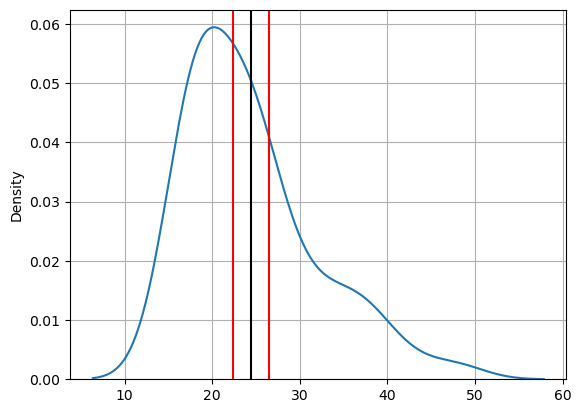

In [44]:
sns.distplot(pd.DataFrame(BMI),hist=False)
plt.axvline(BMI.mean(),color='k')
plt.axvline(lower_limit,color='r')
plt.axvline(upper_limit,color='r')
plt.grid()
plt.show()

**Q17. A data scientist wants to estimate with 95% confidence the proportion of 
young adults having BMI greater than 25.0. A recent study showed that 40% 
of all young adults have BMI greater than 25.0. The data scientist wants to be 
accurate within 2% of the true proportion. Find the minimum sample size 
necessary.**

In [50]:
alpha = 0.05
p = 0.4
q = 1-p
margin_error = 0.02

z_alpha_by_2 = stats.norm.ppf(alpha/2)
z_alpha_by_2

-1.9599639845400545

In [51]:
n = ((z_alpha_by_2/margin_error)**2) * p*q
n

2304.875292416477

**Q18. The same data scientist wants to estimate the true proportion of young 
adults having BMI greater than 25.0. She wants to be 90% confident and 
accurate within 5% of true proportion. Find the minimum sample size 
necessary.**

In [52]:
alpha = 0.1
p = 0.4
q = 1-p
margin_error = 0.05

z_alpha_by_2 = stats.norm.ppf(alpha/2)
z_alpha_by_2

-1.6448536269514729

In [53]:
n = ((z_alpha_by_2/margin_error)**2) * p*q
n

259.73217159315976

**Q19. A researcher claims that currently 55% of all young adults have BMI 
greater than 25 . Test his claim with an alpha =0.05 if out of a random sample 
of 30 CEOs only 20 are having BMI above 25**

In [ ]:
# H0: P = 0.55   
# H1: P!= 0.55
# Two Tailed test

In [63]:
alpha = 0.05
p_samp = 20/30
hypo_p = 0.55
total_ceo = 30

z_stat =(p_samp - hypo_p) / np.sqrt((hypo_p * (1 - hypo_p)) / total_ceo)
z_stat

1.284457725980753

In [64]:
z_critical = stats.norm.isf(alpha/2)
z_critical

1.9599639845400545

In [70]:
p_value = stats.norm.sf(z_stat)
p_value

0.09949092299862139

In [ ]:
# since z statistics value does not lie beyond z critical value thus we fail to reject H0(i.e. accept H0)
# we conclude that currently 55% of all young adults have BMI greater than 25

**Q 20. A data scientist is researching the hypothesis that there is no difference 
between BMI of public vs private schools students. So he collects data from the two 
schools and finds that the proportion of public school students whose BMI is above 
25.0 is 31.8 % vs Private school students is 38.7 %. Suppose the data scientist got 
these values after interviewing 500 students of each school.**

In [71]:
# given
num_pub_scl = 500
num_pvt_scl = 500
x_pub_scl = 0.318
x_pvt_scl = 0.387
alpha =0.05

**a. What hypothesis would he use to compare the proportions of students having 
BMI greater than 25.0 among both the schools.**

In [ ]:
# H0: P1 >= P2 i.e. P1-P2 = 0 ### P1: BMI of Public School
# H1: P1 < P2  i.e. P1-P2 != 0  ### P2: BMI of Private School

**b. What are critical values to be used?**

In [73]:
z_critical = stats.norm.isf(alpha/2)
print('Critical values for two-tailed Z-test:',-z_critical,  z_critical)

Critical values for two-tailed Z-test: -1.9599639845400545 1.9599639845400545


**c. What statistical test will be used to compare these proportions ?**

In [ ]:
# will use Z Proportion Two Sample Test to compare these proportions

**d. Complete the test and obtain the P-value.**

In [74]:
z_stat, p_val =sm.stats.proportions_ztest(count = np.array([x_pub_scl, x_pvt_scl]),
                                          nobs = np.array([num_pub_scl, num_pvt_scl]),
                                          alternative='two-sided')
print('Test statistic:', z_stat)
print('p-value:', p_val)


Test statistic: -0.08220678711782078
p-value: 0.9344822763763402


In [75]:
pvalue = stats.norm.sf(z_stat)
pvalue

0.53275886181183

**e. Summarize his conclusion based on the P-value**

In [ ]:
# since pvalue(0.53) for z proportion test is greater than alpha(0.05), we fail to reject null hypothesis(i.e. accept)
# we conclude that there is no difference between BMI of public vs private schools students

# PART-B ( Dataset Based)--25 points 

## FIFA Case Study :

**A new football club named ‘Brussels United FC’ has just been inaugurated. This club does not have a team yet. The team is looking to hire players for their roster. Management wants to make such decisions using a data-based approach. During a recent hiring drive, you were selected for the Data Science team as a Junior data scientist. Your team has been tasked with creating a report which recommends players for the main team. To start with, a total of 15 players are required. Player data for all teams have been acquired from FIFA. This data contains information about the players, the clubs they are currently playing for, and various performance measures. There is a limited budget for hiring players. The team needs 20 possible players to choose from. You have been requested to formulate a report in order to help the management make a decision regarding potential players**

**Data:**
    
The data contains details for over 25490 players playing in various football clubs in Europe. 
It contains information on age, skill rating, wages, player value, etc. The files provided are 
as follows: fifa.csv – data file. fifa_ variable_information.csv - information on individual 
variables.

**Data Preprocessing:**

**1. Import the necessary libraries and read the data.**

In [184]:
fifa=pd.read_csv('fifa.csv')
fifa.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,240331,P. Camará,21,https://cdn.sofifa.org/players/4/19/240331.png,Guinea Bissau,https://cdn.sofifa.org/flags/119.png,58,69,Crawley Town,https://cdn.sofifa.org/teams/2/light/110890.png,...,46.0,14.0,18.0,15.0,7.0,9.0,9.0,6.0,15.0,€429K
1,183465,J. Rodwell,27,https://cdn.sofifa.org/players/4/19/183465.png,England,https://cdn.sofifa.org/flags/14.png,68,68,Blackburn Rovers,https://cdn.sofifa.org/teams/2/light/3.png,...,69.0,66.0,69.0,64.0,9.0,10.0,15.0,11.0,12.0,€1.8M
2,205186,P. Gazzaniga,26,https://cdn.sofifa.org/players/4/19/205186.png,Argentina,https://cdn.sofifa.org/flags/52.png,74,78,Tottenham Hotspur,https://cdn.sofifa.org/teams/2/light/18.png,...,55.0,23.0,20.0,11.0,76.0,73.0,84.0,72.0,76.0,€9.6M
3,233531,Y. Soteldo,21,https://cdn.sofifa.org/players/4/19/233531.png,Venezuela,https://cdn.sofifa.org/flags/61.png,71,81,Universidad de Chile,https://cdn.sofifa.org/teams/2/light/15029.png,...,65.0,25.0,23.0,20.0,13.0,7.0,9.0,13.0,6.0,€6.1M
4,243718,R. Koot,18,https://cdn.sofifa.org/players/4/19/243718.png,Netherlands,https://cdn.sofifa.org/flags/34.png,56,68,Fortuna Sittard,https://cdn.sofifa.org/teams/2/light/634.png,...,39.0,11.0,14.0,12.0,59.0,55.0,59.0,55.0,56.0,€198K


**2. Drop any columns that you deem unnecessary for analysis.
Hint: At least keep the following columns**
    
['ID','Name','Age','Nationality','Overall','Potential','Value','Wage','Joined','Preferred Foot',
'Contract Valid Until', 'Height', 'Weight', 'Penalties', 'Release Clause',’ International
Reputation’, ‘Position’]
We encourage you to perform an analysis including other variables apart from the above 
variables.

In [185]:
fifa.dtypes

ID                            int64
Name                         object
Age                           int64
Photo                        object
Nationality                  object
Flag                         object
Overall                       int64
Potential                     int64
Club                         object
Club Logo                    object
Value                        object
Wage                         object
Preferred Foot               object
International Reputation    float64
Weak Foot                   float64
Skill Moves                 float64
Work Rate                    object
Body Type                    object
Position                     object
Jersey Number               float64
Joined                       object
Loaned From                  object
Contract Valid Until         object
Height                       object
Weight                       object
Crossing                    float64
Finishing                   float64
HeadingAccuracy             

In [186]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25490 entries, 0 to 25489
Data columns (total 60 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        25490 non-null  int64  
 1   Name                      25490 non-null  object 
 2   Age                       25490 non-null  int64  
 3   Photo                     25490 non-null  object 
 4   Nationality               25490 non-null  object 
 5   Flag                      25490 non-null  object 
 6   Overall                   25490 non-null  int64  
 7   Potential                 25490 non-null  int64  
 8   Club                      25159 non-null  object 
 9   Club Logo                 25490 non-null  object 
 10  Value                     25490 non-null  object 
 11  Wage                      25490 non-null  object 
 12  Preferred Foot            25425 non-null  object 
 13  International Reputation  25425 non-null  float64
 14  Weak F

In [187]:
fifa.drop(['Photo','Flag','Club Logo','Weak Foot','Volleys','Dribbling','Curve',
           'Balance','Jumping','Aggression','Vision','Composure','Marking','StandingTackle',
           'SlidingTackle','GKDiving','GKHandling','GKPositioning'],axis=1,inplace=True)

In [188]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25490 entries, 0 to 25489
Data columns (total 42 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        25490 non-null  int64  
 1   Name                      25490 non-null  object 
 2   Age                       25490 non-null  int64  
 3   Nationality               25490 non-null  object 
 4   Overall                   25490 non-null  int64  
 5   Potential                 25490 non-null  int64  
 6   Club                      25159 non-null  object 
 7   Value                     25490 non-null  object 
 8   Wage                      25490 non-null  object 
 9   Preferred Foot            25425 non-null  object 
 10  International Reputation  25425 non-null  float64
 11  Skill Moves               25425 non-null  float64
 12  Work Rate                 25425 non-null  object 
 13  Body Type                 25425 non-null  object 
 14  Positi

In [189]:
# After dropping unnessesary columns we are now left with 42 columns

**3. The following columns need to be converted for further analysis:**

['Value','Wage','Joined','Contract Valid Until','Height','Weight','Release Clause']

(You might encounter Nan values in the above columns. Pandas treat Nan values as a 
float. Please keep that in mind when making the conversions.)

## Value

In [190]:
fifa['Value'].unique()

array(['€220K', '€925K', '€5M', '€3.8M', '€120K', '€775K', '€9.5M',
       '€600K', '€2.9M', '€525K', '€1M', '€10M', '€180K', '€8M', '€450K',
       '€1.6M', '€7M', '€650K', '€10.5M', '€300K', '€230K', '€100K',
       '€3M', '€4.4M', '€4.5M', '€240K', '€475K', '€42.5M', '€425K',
       '€130K', '€700K', '€1.1M', '€4.2M', '€6.5M', '€550K', '€350K',
       '€375K', '€4M', '€3.1M', '€4.3M', '€0', '€6M', '€160K', '€2.2M',
       '€875K', '€50K', '€725K', '€1.4M', '€675K', '€110K', '€40K',
       '€500K', '€260K', '€9M', '€750K', '€12M', '€3.3M', '€1.8M', '€14M',
       '€18.5M', '€2.8M', '€1.2M', '€190K', '€825K', '€950K', '€900K',
       '€625K', '€13M', '€280K', '€3.4M', '€800K', '€5.5M', '€60K',
       '€1.3M', '€400K', '€140K', '€1.7M', '€325K', '€575K', '€17M',
       '€26.5M', '€25M', '€2.6M', '€3.7M', '€2.3M', '€2.4M', '€250K',
       '€90K', '€290K', '€1.5M', '€170K', '€850K', '€3.5M', '€16.5M',
       '€15.5M', '€3.2M', '€8.5M', '€7.5M', '€30K', '€30M', '€270K',
       '€22M', '€2

In [191]:
fifa['Value_2'] = fifa['Value'].apply(lambda x:x[1:-1])
fifa.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Stamina,Strength,LongShots,Interceptions,Positioning,Penalties,GKKicking,GKReflexes,Release Clause,Value_2
0,240331,P. Camará,21,Guinea Bissau,58,69,Crawley Town,€220K,€1K,Right,...,58.0,62.0,56.0,13.0,55.0,58.0,9.0,15.0,€429K,220
1,183465,J. Rodwell,27,England,68,68,Blackburn Rovers,€925K,€16K,Right,...,51.0,71.0,70.0,68.0,67.0,57.0,15.0,12.0,€1.8M,925
2,205186,P. Gazzaniga,26,Argentina,74,78,Tottenham Hotspur,€5M,€46K,Right,...,45.0,67.0,19.0,16.0,13.0,41.0,84.0,76.0,€9.6M,5
3,233531,Y. Soteldo,21,Venezuela,71,81,Universidad de Chile,€3.8M,€6K,Right,...,60.0,30.0,66.0,24.0,65.0,71.0,9.0,6.0,€6.1M,3.8
4,243718,R. Koot,18,Netherlands,56,68,Fortuna Sittard,€120K,€1K,Right,...,20.0,45.0,5.0,11.0,4.0,15.0,59.0,56.0,€198K,120


In [192]:
fifa['Value_2'] = pd.to_numeric(fifa['Value_2'], errors='ignore')

In [193]:
def value_col(x,y):
    if 'M' in x:
        return y*1000000
    else:
        return y*1000

In [194]:
fifa['Value'] = value_col(fifa['Value'],fifa['Value_2'])
fifa.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Stamina,Strength,LongShots,Interceptions,Positioning,Penalties,GKKicking,GKReflexes,Release Clause,Value_2
0,240331,P. Camará,21,Guinea Bissau,58,69,Crawley Town,220000.0,€1K,Right,...,58.0,62.0,56.0,13.0,55.0,58.0,9.0,15.0,€429K,220.0
1,183465,J. Rodwell,27,England,68,68,Blackburn Rovers,925000.0,€16K,Right,...,51.0,71.0,70.0,68.0,67.0,57.0,15.0,12.0,€1.8M,925.0
2,205186,P. Gazzaniga,26,Argentina,74,78,Tottenham Hotspur,5000.0,€46K,Right,...,45.0,67.0,19.0,16.0,13.0,41.0,84.0,76.0,€9.6M,5.0
3,233531,Y. Soteldo,21,Venezuela,71,81,Universidad de Chile,3800.0,€6K,Right,...,60.0,30.0,66.0,24.0,65.0,71.0,9.0,6.0,€6.1M,3.8
4,243718,R. Koot,18,Netherlands,56,68,Fortuna Sittard,120000.0,€1K,Right,...,20.0,45.0,5.0,11.0,4.0,15.0,59.0,56.0,€198K,120.0


## Wage

In [195]:
fifa['Wage'].unique()

array(['€1K', '€16K', '€46K', '€6K', '€8K', '€39K', '€2K', '€19K', '€4K',
       '€28K', '€26K', '€10K', '€17K', '€11K', '€47K', '€3K', '€34K',
       '€115K', '€13K', '€23K', '€9K', '€44K', '€5K', '€0', '€40K',
       '€50K', '€32K', '€30K', '€25K', '€7K', '€24K', '€29K', '€15K',
       '€27K', '€20K', '€22K', '€35K', '€14K', '€140K', '€130K', '€12K',
       '€21K', '€41K', '€31K', '€105K', '€120K', '€48K', '€51K', '€53K',
       '€37K', '€73K', '€315K', '€165K', '€96K', '€70K', '€18K', '€71K',
       '€66K', '€52K', '€60K', '€42K', '€75K', '€38K', '€36K', '€87K',
       '€160K', '€43K', '€88K', '€77K', '€84K', '€64K', '€340K', '€54K',
       '€55K', '€33K', '€79K', '€72K', '€68K', '€62K', '€45K', '€61K',
       '€175K', '€59K', '€125K', '€85K', '€65K', '€405K', '€95K', '€76K',
       '€150K', '€74K', '€155K', '€57K', '€58K', '€49K', '€300K', '€56K',
       '€80K', '€99K', '€230K', '€135K', '€285K', '€83K', '€205K', '€78K',
       '€86K', '€100K', '€91K', '€240K', '€92K', '€97K', '€45

In [196]:
fifa['Wage'] = fifa['Wage'].apply(lambda x:x[1:-1])
fifa.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Stamina,Strength,LongShots,Interceptions,Positioning,Penalties,GKKicking,GKReflexes,Release Clause,Value_2
0,240331,P. Camará,21,Guinea Bissau,58,69,Crawley Town,220000.0,1,Right,...,58.0,62.0,56.0,13.0,55.0,58.0,9.0,15.0,€429K,220.0
1,183465,J. Rodwell,27,England,68,68,Blackburn Rovers,925000.0,16,Right,...,51.0,71.0,70.0,68.0,67.0,57.0,15.0,12.0,€1.8M,925.0
2,205186,P. Gazzaniga,26,Argentina,74,78,Tottenham Hotspur,5000.0,46,Right,...,45.0,67.0,19.0,16.0,13.0,41.0,84.0,76.0,€9.6M,5.0
3,233531,Y. Soteldo,21,Venezuela,71,81,Universidad de Chile,3800.0,6,Right,...,60.0,30.0,66.0,24.0,65.0,71.0,9.0,6.0,€6.1M,3.8
4,243718,R. Koot,18,Netherlands,56,68,Fortuna Sittard,120000.0,1,Right,...,20.0,45.0,5.0,11.0,4.0,15.0,59.0,56.0,€198K,120.0


In [197]:
# considering all the values of wage were in column we will change it into correct value
fifa['Wage'] = pd.to_numeric(fifa['Wage'],errors='coerce')

In [198]:
fifa['Wage'] = fifa['Wage'].apply(lambda x:x*1000)
fifa.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Stamina,Strength,LongShots,Interceptions,Positioning,Penalties,GKKicking,GKReflexes,Release Clause,Value_2
0,240331,P. Camará,21,Guinea Bissau,58,69,Crawley Town,220000.0,1000.0,Right,...,58.0,62.0,56.0,13.0,55.0,58.0,9.0,15.0,€429K,220.0
1,183465,J. Rodwell,27,England,68,68,Blackburn Rovers,925000.0,16000.0,Right,...,51.0,71.0,70.0,68.0,67.0,57.0,15.0,12.0,€1.8M,925.0
2,205186,P. Gazzaniga,26,Argentina,74,78,Tottenham Hotspur,5000.0,46000.0,Right,...,45.0,67.0,19.0,16.0,13.0,41.0,84.0,76.0,€9.6M,5.0
3,233531,Y. Soteldo,21,Venezuela,71,81,Universidad de Chile,3800.0,6000.0,Right,...,60.0,30.0,66.0,24.0,65.0,71.0,9.0,6.0,€6.1M,3.8
4,243718,R. Koot,18,Netherlands,56,68,Fortuna Sittard,120000.0,1000.0,Right,...,20.0,45.0,5.0,11.0,4.0,15.0,59.0,56.0,€198K,120.0


## Joined

In [199]:
fifa['Joined'].unique()

array(['Jun 8, 2017', 'Aug 23, 2018', 'Aug 23, 2017', ..., 'Aug 9, 2012',
       'Jul 13, 2014', 'May 4, 2010'], dtype=object)

In [200]:
fifa.isna().sum()

ID                              0
Name                            0
Age                             0
Nationality                     0
Overall                         0
Potential                       0
Club                          331
Value                         342
Wage                          331
Preferred Foot                 65
International Reputation       65
Skill Moves                    65
Work Rate                      65
Body Type                      65
Position                       89
Jersey Number                  89
Joined                       2171
Loaned From                 23715
Contract Valid Until          396
Height                         65
Weight                         65
Crossing                       65
Finishing                      65
HeadingAccuracy                65
ShortPassing                   65
FKAccuracy                     65
LongPassing                    65
BallControl                    65
Acceleration                   65
SprintSpeed   

In [201]:
fifa['Joined'].fillna(fifa['Joined'].mode()[0],inplace=True)

In [202]:
fifa['Joined']=fifa['Joined'].apply(lambda x:x[-4:])
fifa['Joined'].unique()

array(['2017', '2018', '2016', '2015', '2014', '2011', '2006', '2012',
       '2013', '2007', '2009', '2010', '2008', '2004', '2005', '1998',
       '2003', '2002', '1991', '1999', '2001', '2000'], dtype=object)

## Contract Valid Until

In [203]:
fifa['Contract Valid Until'].unique()

array(['2019', '2022', '2018', '2020', '2021', '2024', 'Jun 30, 2019',
       '2023', 'Dec 31, 2018', 'Jan 1, 2019', nan, 'Jan 5, 2019',
       'May 31, 2019', 'Dec 31, 2019', 'Jan 3, 2019', 'May 31, 2020',
       'Jan 31, 2019', 'Jun 30, 2020', 'Jan 7, 2019', 'Feb 27, 2020',
       'Jan 12, 2019', '2026', 'Jun 1, 2019', 'Jan 6, 2019',
       'Nov 30, 2018', 'Dec 1, 2019', 'Jan 30, 2019', 'Jan 2, 2019',
       'Jan 25, 2019', '2025', 'Jan 11, 2019', 'Oct 14, 2019',
       'May 4, 2019', 'Jan 20, 2019', 'Jan 15, 2019'], dtype=object)

In [204]:
fifa['Contract Valid Until'] = pd.DatetimeIndex(fifa['Contract Valid Until']).year
fifa['Contract Valid Until'].unique()

array([2019., 2022., 2018., 2020., 2021., 2024., 2023.,   nan, 2026.,
       2025.])

## Height

In [205]:
fifa['Height'].unique()

array(["6'1", "6'2", "6'5", "5'3", "5'8", "5'11", "5'10", "5'9", "6'3",
       "5'7", "6'0", "6'4", "5'4", "5'5", "5'6", "6'6", nan, "6'8", "5'2",
       "6'7", "5'1", "6'9"], dtype=object)

In [206]:
fifa['Height'].fillna(fifa['Height'].mode()[0],inplace=True)

In [207]:
lst=[]
for i in fifa['Height']:
    a=float(i[0])
    b=float(i[2:])*0.083
    c=a+b
    lst.append(c)

In [208]:
fifa['Height'] = pd.Series(lst)
fifa['Height'].unique()

array([6.083, 6.166, 6.415, 5.249, 5.664, 5.913, 5.83 , 5.747, 6.249,
       5.581, 6.   , 6.332, 5.332, 5.415, 5.498, 6.498, 6.664, 5.166,
       6.581, 5.083, 6.747])

## Weight

In [209]:
fifa['Weight'].unique()

array(['161lbs', '172lbs', '198lbs', '121lbs', '176lbs', '207lbs',
       '152lbs', '165lbs', '170lbs', '157lbs', '179lbs', '174lbs',
       '190lbs', '154lbs', '187lbs', '146lbs', '141lbs', '148lbs',
       '139lbs', '168lbs', '163lbs', '183lbs', '159lbs', '150lbs',
       '209lbs', '143lbs', '137lbs', '192lbs', '134lbs', '181lbs',
       '194lbs', '123lbs', '185lbs', '132lbs', '201lbs', '196lbs', nan,
       '212lbs', '205lbs', '130lbs', '128lbs', '203lbs', '119lbs',
       '214lbs', '117lbs', '220lbs', '216lbs', '227lbs', '126lbs',
       '223lbs', '218lbs', '225lbs', '110lbs', '243lbs', '236lbs',
       '234lbs', '229lbs'], dtype=object)

In [210]:
fifa['Weight'].fillna(fifa['Weight'].mode()[0],inplace=True)

In [211]:
fifa['Weight'] = fifa['Weight'].map(lambda x:x[0:3])
fifa['Weight'].unique()

array(['161', '172', '198', '121', '176', '207', '152', '165', '170',
       '157', '179', '174', '190', '154', '187', '146', '141', '148',
       '139', '168', '163', '183', '159', '150', '209', '143', '137',
       '192', '134', '181', '194', '123', '185', '132', '201', '196',
       '212', '205', '130', '128', '203', '119', '214', '117', '220',
       '216', '227', '126', '223', '218', '225', '110', '243', '236',
       '234', '229'], dtype=object)

In [212]:
fifa['Weight'] = fifa['Weight'].astype(float)
fifa['Weight'].unique()

array([161., 172., 198., 121., 176., 207., 152., 165., 170., 157., 179.,
       174., 190., 154., 187., 146., 141., 148., 139., 168., 163., 183.,
       159., 150., 209., 143., 137., 192., 134., 181., 194., 123., 185.,
       132., 201., 196., 212., 205., 130., 128., 203., 119., 214., 117.,
       220., 216., 227., 126., 223., 218., 225., 110., 243., 236., 234.,
       229.])

## Release Clause

In [213]:
fifa['Release Clause'].unique()

array(['€429K', '€1.8M', '€9.6M', ..., '€818K', '€84K', '€379K'],
      dtype=object)

In [214]:
fifa['Release Clause'].fillna(fifa['Release Clause'].mode()[0],inplace=True)

In [225]:
fifa['Release Clause_2'] = fifa['Release Clause'].apply(lambda x:x[1:-1])
fifa.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Strength,LongShots,Interceptions,Positioning,Penalties,GKKicking,GKReflexes,Release Clause,Value_2,Release Clause_2
0,240331,P. Camará,21,Guinea Bissau,58,69,Crawley Town,220000.0,1000.0,Right,...,62.0,56.0,13.0,55.0,58.0,9.0,15.0,€429K,220.0,429
1,183465,J. Rodwell,27,England,68,68,Blackburn Rovers,925000.0,16000.0,Right,...,71.0,70.0,68.0,67.0,57.0,15.0,12.0,€1.8M,925.0,1.8
2,205186,P. Gazzaniga,26,Argentina,74,78,Tottenham Hotspur,5000.0,46000.0,Right,...,67.0,19.0,16.0,13.0,41.0,84.0,76.0,€9.6M,5.0,9.6
3,233531,Y. Soteldo,21,Venezuela,71,81,Universidad de Chile,3800.0,6000.0,Right,...,30.0,66.0,24.0,65.0,71.0,9.0,6.0,€6.1M,3.8,6.1
4,243718,R. Koot,18,Netherlands,56,68,Fortuna Sittard,120000.0,1000.0,Right,...,45.0,5.0,11.0,4.0,15.0,59.0,56.0,€198K,120.0,198


In [226]:
fifa['Release Clause_2'] = pd.to_numeric(fifa['Release Clause_2'],errors='ignore')

In [227]:
fifa['Release Clause'] = value_col(fifa['Release Clause'],fifa['Release Clause_2'])
fifa.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Strength,LongShots,Interceptions,Positioning,Penalties,GKKicking,GKReflexes,Release Clause,Value_2,Release Clause_2
0,240331,P. Camará,21,Guinea Bissau,58,69,Crawley Town,220000.0,1000.0,Right,...,62.0,56.0,13.0,55.0,58.0,9.0,15.0,429000.0,220.0,429.0
1,183465,J. Rodwell,27,England,68,68,Blackburn Rovers,925000.0,16000.0,Right,...,71.0,70.0,68.0,67.0,57.0,15.0,12.0,1800.0,925.0,1.8
2,205186,P. Gazzaniga,26,Argentina,74,78,Tottenham Hotspur,5000.0,46000.0,Right,...,67.0,19.0,16.0,13.0,41.0,84.0,76.0,9600.0,5.0,9.6
3,233531,Y. Soteldo,21,Venezuela,71,81,Universidad de Chile,3800.0,6000.0,Right,...,30.0,66.0,24.0,65.0,71.0,9.0,6.0,6100.0,3.8,6.1
4,243718,R. Koot,18,Netherlands,56,68,Fortuna Sittard,120000.0,1000.0,Right,...,45.0,5.0,11.0,4.0,15.0,59.0,56.0,198000.0,120.0,198.0


In [228]:
fifa.drop(columns=['Value_2','Release Clause_2'],axis=1,inplace=True)
fifa.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,ShotPower,Stamina,Strength,LongShots,Interceptions,Positioning,Penalties,GKKicking,GKReflexes,Release Clause
0,240331,P. Camará,21,Guinea Bissau,58,69,Crawley Town,220000.0,1000.0,Right,...,58.0,58.0,62.0,56.0,13.0,55.0,58.0,9.0,15.0,429000.0
1,183465,J. Rodwell,27,England,68,68,Blackburn Rovers,925000.0,16000.0,Right,...,72.0,51.0,71.0,70.0,68.0,67.0,57.0,15.0,12.0,1800.0
2,205186,P. Gazzaniga,26,Argentina,74,78,Tottenham Hotspur,5000.0,46000.0,Right,...,49.0,45.0,67.0,19.0,16.0,13.0,41.0,84.0,76.0,9600.0
3,233531,Y. Soteldo,21,Venezuela,71,81,Universidad de Chile,3800.0,6000.0,Right,...,60.0,60.0,30.0,66.0,24.0,65.0,71.0,9.0,6.0,6100.0
4,243718,R. Koot,18,Netherlands,56,68,Fortuna Sittard,120000.0,1000.0,Right,...,17.0,20.0,45.0,5.0,11.0,4.0,15.0,59.0,56.0,198000.0


**4. Check the duplicate records and do appropriate treatments.**

In [230]:
fifa.duplicated().sum()

11833

In [231]:
fifa[fifa.duplicated()]

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,ShotPower,Stamina,Strength,LongShots,Interceptions,Positioning,Penalties,GKKicking,GKReflexes,Release Clause
152,211732,T. Thiele,26,Germany,67,68,1. FC Kaiserslautern,900000.0,3000.0,Right,...,69.0,75.0,76.0,57.0,20.0,67.0,63.0,15.0,11.0,1400.0
290,227708,Lucas Tagliapietra,27,Brazil,69,71,Al Batin,1000.0,7000.0,Left,...,38.0,68.0,90.0,21.0,71.0,24.0,36.0,9.0,6.0,1800.0
321,240584,B. Verbong,18,Netherlands,58,70,VVV-Venlo,160000.0,1000.0,Right,...,17.0,16.0,49.0,5.0,9.0,4.0,17.0,60.0,58.0,264000.0
373,231823,J. Hoogma,20,Netherlands,69,80,TSG 1899 Hoffenheim,1600.0,10000.0,Left,...,47.0,67.0,76.0,24.0,71.0,32.0,35.0,14.0,9.0,3000.0
378,238160,M. Demiral,20,Turkey,73,83,Alanyaspor,5500.0,7000.0,Left,...,60.0,69.0,82.0,38.0,77.0,26.0,41.0,13.0,11.0,1100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25484,201401,Campabadal,25,Spain,68,73,CD Lugo,975000.0,4000.0,Right,...,50.0,67.0,67.0,63.0,70.0,22.0,48.0,12.0,14.0,1600.0
25485,207559,S. Tibbling,23,Sweden,73,79,Brøndby IF,5500.0,19000.0,Right,...,59.0,84.0,68.0,55.0,68.0,62.0,52.0,12.0,14.0,8300.0
25486,205157,Ruiz de Galarreta,24,Spain,70,75,UD Las Palmas,2300.0,6000.0,Right,...,62.0,70.0,58.0,63.0,64.0,58.0,47.0,13.0,12.0,3900.0
25487,188802,M. Schmelzer,30,Germany,77,77,Borussia Dortmund,6500.0,43000.0,Left,...,74.0,82.0,75.0,60.0,78.0,54.0,46.0,15.0,8.0,11100.0


In [232]:
fifa['ID'].duplicated().sum()

11833

In [233]:
fifa.ID.nunique()

13657

In [234]:
fifa['ID'].duplicated().sum() + fifa.ID.nunique()

25490

In [235]:
fifa.shape[0]

25490

In [ ]:
# Thus we can infer that there are 11833 duplicated rows in the dataset. These can be treated by removing them.

In [236]:
fifa.drop_duplicates(inplace=True)

In [237]:
fifa.shape

(13657, 42)

**5. Check the variation of the features.**

If you are performing variance and standard deviation. Kindly explain why the variances of 
the variables are higher than the standard deviation.
Also, explain which one tells the exact variation of the features.
Based on this analysis decide which feature is not needed.

In [240]:
fifa.dtypes

ID                            int64
Name                         object
Age                           int64
Nationality                  object
Overall                       int64
Potential                     int64
Club                         object
Value                       float64
Wage                        float64
Preferred Foot               object
International Reputation    float64
Skill Moves                 float64
Work Rate                    object
Body Type                    object
Position                     object
Jersey Number               float64
Joined                       object
Loaned From                  object
Contract Valid Until        float64
Height                      float64
Weight                      float64
Crossing                    float64
Finishing                   float64
HeadingAccuracy             float64
ShortPassing                float64
FKAccuracy                  float64
LongPassing                 float64
BallControl                 

In [249]:
fifa['ID'] = fifa['ID'].astype(str)

In [244]:
fifa['Jersey Number'] = fifa['Jersey Number'].astype(str)

In [245]:
fifa['Contract Valid Until'] = fifa['Contract Valid Until'].astype(str)

In [246]:
fifa['Positioning'] = fifa['Positioning'].astype(str)

In [250]:
fifa.select_dtypes(include=np.number).columns

Index(['Age', 'Overall', 'Potential', 'Value', 'Wage',
       'International Reputation', 'Skill Moves', 'Height', 'Weight',
       'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'ShotPower', 'Stamina',
       'Strength', 'LongShots', 'Interceptions', 'Penalties', 'GKKicking',
       'GKReflexes', 'Release Clause'],
      dtype='object')

In [251]:
fifa.describe()

,Age,Overall,Potential,Value,Wage,International Reputation,Skill Moves,Height,Weight,Crossing,...,Reactions,ShotPower,Stamina,Strength,LongShots,Interceptions,Penalties,GKKicking,GKReflexes,Release Clause
count,13657.000000,13657.000000,13657.000000,13465.000000,13472.000000,13621.000000,13621.000000,13657.000000,13657.000000,13621.000000,...,13621.000000,13621.000000,13621.000000,13621.000000,13621.000000,13621.000000,13621.000000,13621.000000,13621.000000,13657.000000
mean,25.082595,66.205023,71.307022,269127.656888,9778.652019,1.110344,2.362235,5.945830,166.008054,49.748844,...,61.791425,55.438220,63.152705,65.275604,47.083327,46.664489,48.573086,16.285882,16.757507,210103.324303
std,4.644942,6.901866,6.114532,289420.770694,22000.593760,0.388449,0.759121,0.220615,15.574996,18.389488,...,9.034420,17.211365,15.931089,12.539832,19.283385,20.643514,15.714240,16.554318,18.020151,293525.633627
min,16.000000,46.000000,48.000000,1000.000000,1000.000000,1.000000,1.000000,5.083000,110.000000,5.000000,...,21.000000,2.000000,13.000000,17.000000,4.000000,3.000000,5.000000,1.000000,1.000000,1000.000000
25%,21.000000,62.000000,67.000000,5000.000000,1000.000000,1.000000,2.000000,5.747000,154.000000,38.000000,...,56.000000,45.000000,56.000000,58.000000,33.000000,26.000000,39.000000,8.000000,8.000000,1800.000000
50%,25.000000,66.000000,71.000000,170000.000000,3000.000000,1.000000,2.000000,5.913000,165.000000,54.000000,...,62.000000,59.000000,66.000000,66.000000,51.000000,52.000000,50.000000,11.000000,11.000000,12400.000000
75%,28.000000,71.000000,75.000000,475000.000000,9000.000000,1.000000,3.000000,6.083000,176.000000,64.000000,...,68.000000,68.000000,74.000000,74.000000,62.000000,64.000000,60.000000,14.000000,14.000000,392000.000000
max,45.000000,94.000000,95.000000,975000.000000,455000.000000,5.000000,5.000000,6.747000,243.000000,93.000000,...,96.000000,95.000000,96.000000,97.000000,93.000000,92.000000,90.000000,88.000000,94.000000,999000.000000


In [254]:
fifa.describe(include=object)

,ID,Name,Nationality,Club,Preferred Foot,Work Rate,Body Type,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Positioning
count,13657,13657,13657,13472,13621,13621,13621,13610,13657,13657,943,13657,13657
unique,13657,13053,160,651,2,9,9,27,99,22,308,10,94
top,240331,J. Rodríguez,England,AS Monaco,Right,Medium/ Medium,Normal,ST,8.0,2018,Atalanta,2019.0,58.0
freq,1,8,1244,29,10447,7353,7942,1575,472,6098,15,4450,433


**6. Check for missing values and do imputations where necessary.Note: Do the appropriate 
imputation based on the distribution.**

Hints:
Few analyses are listed below to decide which imputation method to perform.
1. Skewness level verification
2. Kurtosis level measurement identification
Explain what the Skewness and Kurtosis depicted.
3. Distribution plots like KDE, Distribution plot, Box plot, etc.


In [255]:
fifa.isnull().sum()

ID                              0
Name                            0
Age                             0
Nationality                     0
Overall                         0
Potential                       0
Club                          185
Value                         192
Wage                          185
Preferred Foot                 36
International Reputation       36
Skill Moves                    36
Work Rate                      36
Body Type                      36
Position                       47
Jersey Number                   0
Joined                          0
Loaned From                 12714
Contract Valid Until            0
Height                          0
Weight                          0
Crossing                       36
Finishing                      36
HeadingAccuracy                36
ShortPassing                   36
FKAccuracy                     36
LongPassing                    36
BallControl                    36
Acceleration                   36
SprintSpeed   

In [256]:
fifa['Preferred Foot'].fillna(fifa['Preferred Foot'].mode()[0],inplace=True)

In [258]:
num_cols = fifa.select_dtypes(include=np.number).columns
num_cols

Index(['Age', 'Overall', 'Potential', 'Value', 'Wage',
       'International Reputation', 'Skill Moves', 'Height', 'Weight',
       'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'ShotPower', 'Stamina',
       'Strength', 'LongShots', 'Interceptions', 'Penalties', 'GKKicking',
       'GKReflexes', 'Release Clause'],
      dtype='object')

In [259]:
for i in num_cols:
    fifa.loc[:,i].fillna(fifa.loc[:,i].median(),inplace=True)

In [260]:
fifa.isnull().sum()

ID                              0
Name                            0
Age                             0
Nationality                     0
Overall                         0
Potential                       0
Club                          185
Value                           0
Wage                            0
Preferred Foot                  0
International Reputation        0
Skill Moves                     0
Work Rate                      36
Body Type                      36
Position                       47
Jersey Number                   0
Joined                          0
Loaned From                 12714
Contract Valid Until            0
Height                          0
Weight                          0
Crossing                        0
Finishing                       0
HeadingAccuracy                 0
ShortPassing                    0
FKAccuracy                      0
LongPassing                     0
BallControl                     0
Acceleration                    0
SprintSpeed   

In [261]:
cat_cols = fifa.select_dtypes(include='object').columns
cat_cols

Index(['ID', 'Name', 'Nationality', 'Club', 'Preferred Foot', 'Work Rate',
       'Body Type', 'Position', 'Jersey Number', 'Joined', 'Loaned From',
       'Contract Valid Until', 'Positioning'],
      dtype='object')

In [262]:
for i in cat_cols:
    fifa.loc[:,i].fillna(fifa.loc[:,i].mode()[0],inplace=True)

In [263]:
fifa.isnull().sum()

ID                          0
Name                        0
Age                         0
Nationality                 0
Overall                     0
Potential                   0
Club                        0
Value                       0
Wage                        0
Preferred Foot              0
International Reputation    0
Skill Moves                 0
Work Rate                   0
Body Type                   0
Position                    0
Jersey Number               0
Joined                      0
Loaned From                 0
Contract Valid Until        0
Height                      0
Weight                      0
Crossing                    0
Finishing                   0
HeadingAccuracy             0
ShortPassing                0
FKAccuracy                  0
LongPassing                 0
BallControl                 0
Acceleration                0
SprintSpeed                 0
Agility                     0
Reactions                   0
ShotPower                   0
Stamina   

## 1. Skewness level verification

In [264]:
for i in num_cols:
     print("The skewness of ",i,"is: ",fifa.loc[:,i].skew())

The skewness of  Age is:  0.3924359866802895
The skewness of  Overall is:  0.07005213222619722
The skewness of  Potential is:  0.26105553820860616
The skewness of  Value is:  0.8245633848402592
The skewness of  Wage is:  7.711352496259566
The skewness of  International Reputation is:  4.110984208197516
The skewness of  Skill Moves is:  0.15754138725909464
The skewness of  Height is:  -0.006014585559623168
The skewness of  Weight is:  0.2287748324411052
The skewness of  Crossing is:  -0.5997412427294276
The skewness of  Finishing is:  -0.30342506750462334
The skewness of  HeadingAccuracy is:  -0.8788492585141396
The skewness of  ShortPassing is:  -1.0961833762906255
The skewness of  FKAccuracy is:  0.10900904554475777
The skewness of  LongPassing is:  -0.5975670868255385
The skewness of  BallControl is:  -1.2683331062591243
The skewness of  Acceleration is:  -0.8210062759431352
The skewness of  SprintSpeed is:  -0.8198090302175591
The skewness of  Agility is:  -0.5916779333134791
The sk

## 2. Kurtosis level measurement identification

In [265]:
for i in num_cols:
     print("The kurtosis of ",i,"is: ",fifa.loc[:,i].kurt())

The kurtosis of  Age is:  -0.4578023667068787
The kurtosis of  Overall is:  0.09317544430402824
The kurtosis of  Potential is:  0.012374220702191518
The kurtosis of  Value is:  -0.5485721176660987
The kurtosis of  Wage is:  91.23350843020864
The kurtosis of  International Reputation is:  19.43349222681358
The kurtosis of  Skill Moves is:  -0.07643614117116693
The kurtosis of  Height is:  -0.26467598816468163
The kurtosis of  Weight is:  0.12348003209931946
The kurtosis of  Crossing is:  -0.5412124486395218
The kurtosis of  Finishing is:  -0.9673827074973991
The kurtosis of  HeadingAccuracy is:  0.28881494178755496
The kurtosis of  ShortPassing is:  0.7697262743675166
The kurtosis of  FKAccuracy is:  -0.730910886698084
The kurtosis of  LongPassing is:  -0.37224168515651135
The kurtosis of  BallControl is:  1.0195329949049219
The kurtosis of  Acceleration is:  0.49340418291693355
The kurtosis of  SprintSpeed is:  0.519258620388114
The kurtosis of  Agility is:  -0.071923504246171
The kurt

## 3. Distribution plots like KDE, Distribution plot, Box plot, etc.

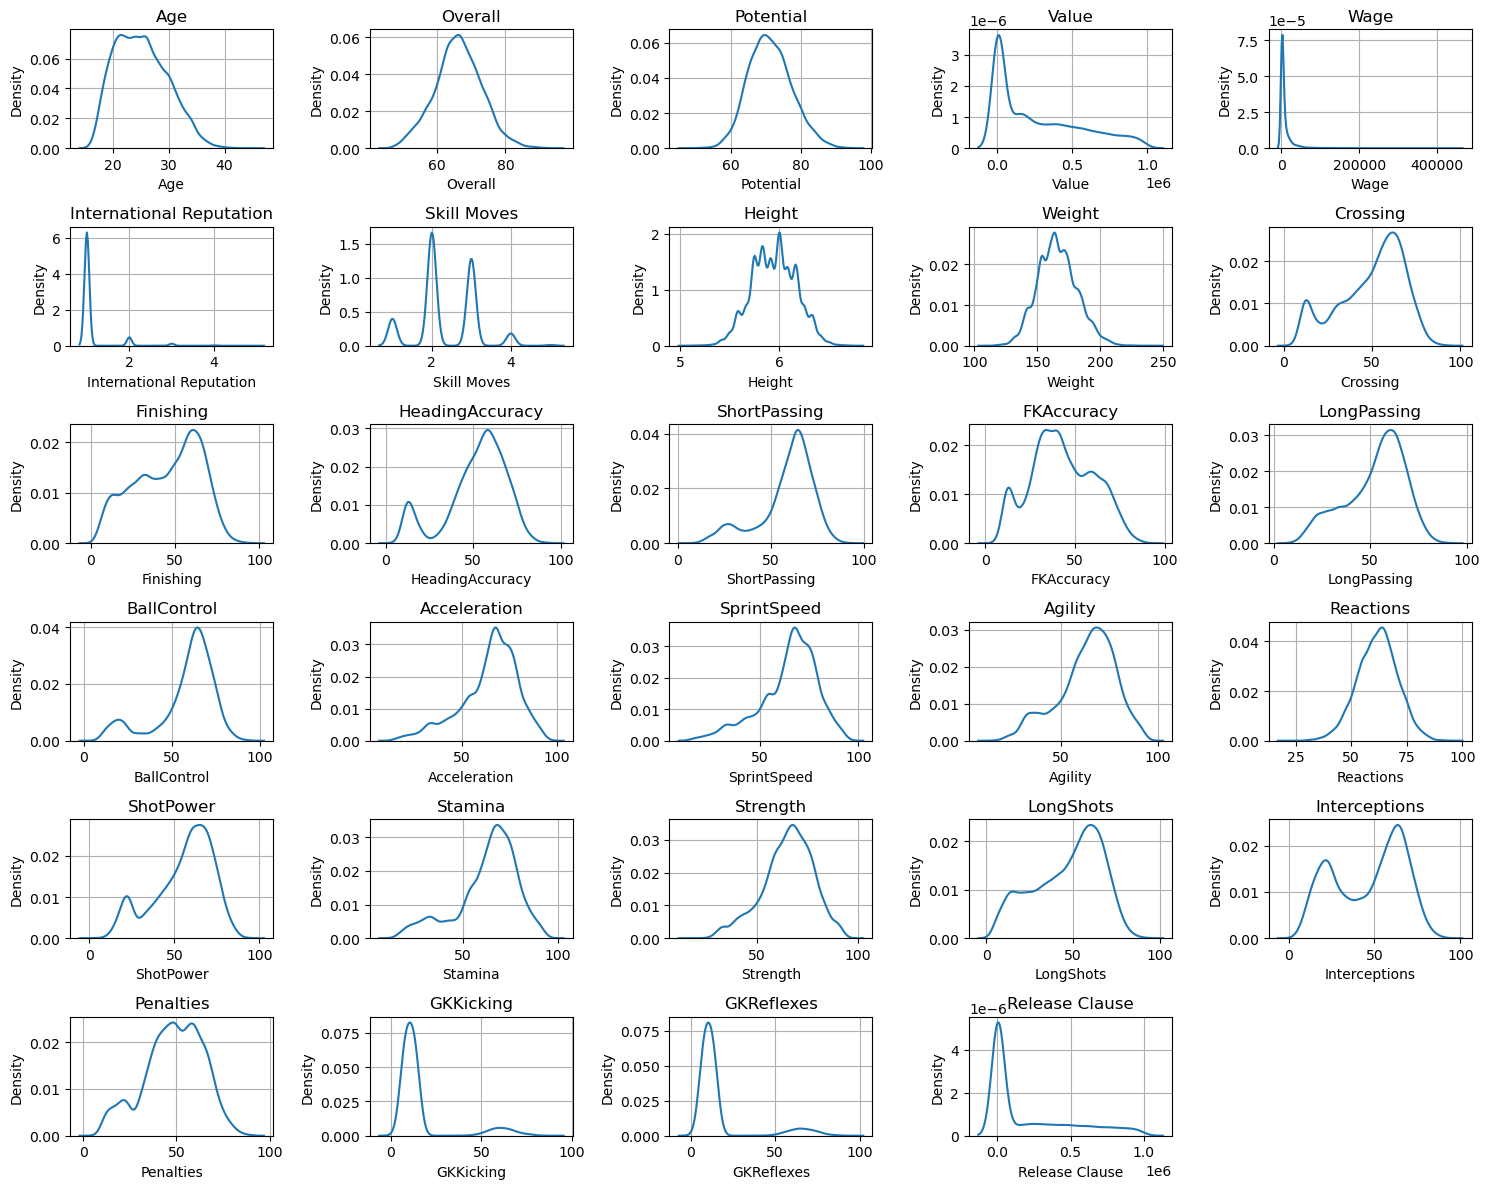

In [273]:
row = 6
col = 5
iterator = 1
plt.figure(figsize=(15,12))
for i in num_cols:
    plt.subplot(row,col,iterator)
    sns.distplot(fifa.loc[:,i],hist=False)
    plt.title(i)
    plt.grid()
    iterator += 1
plt.tight_layout()
plt.show()

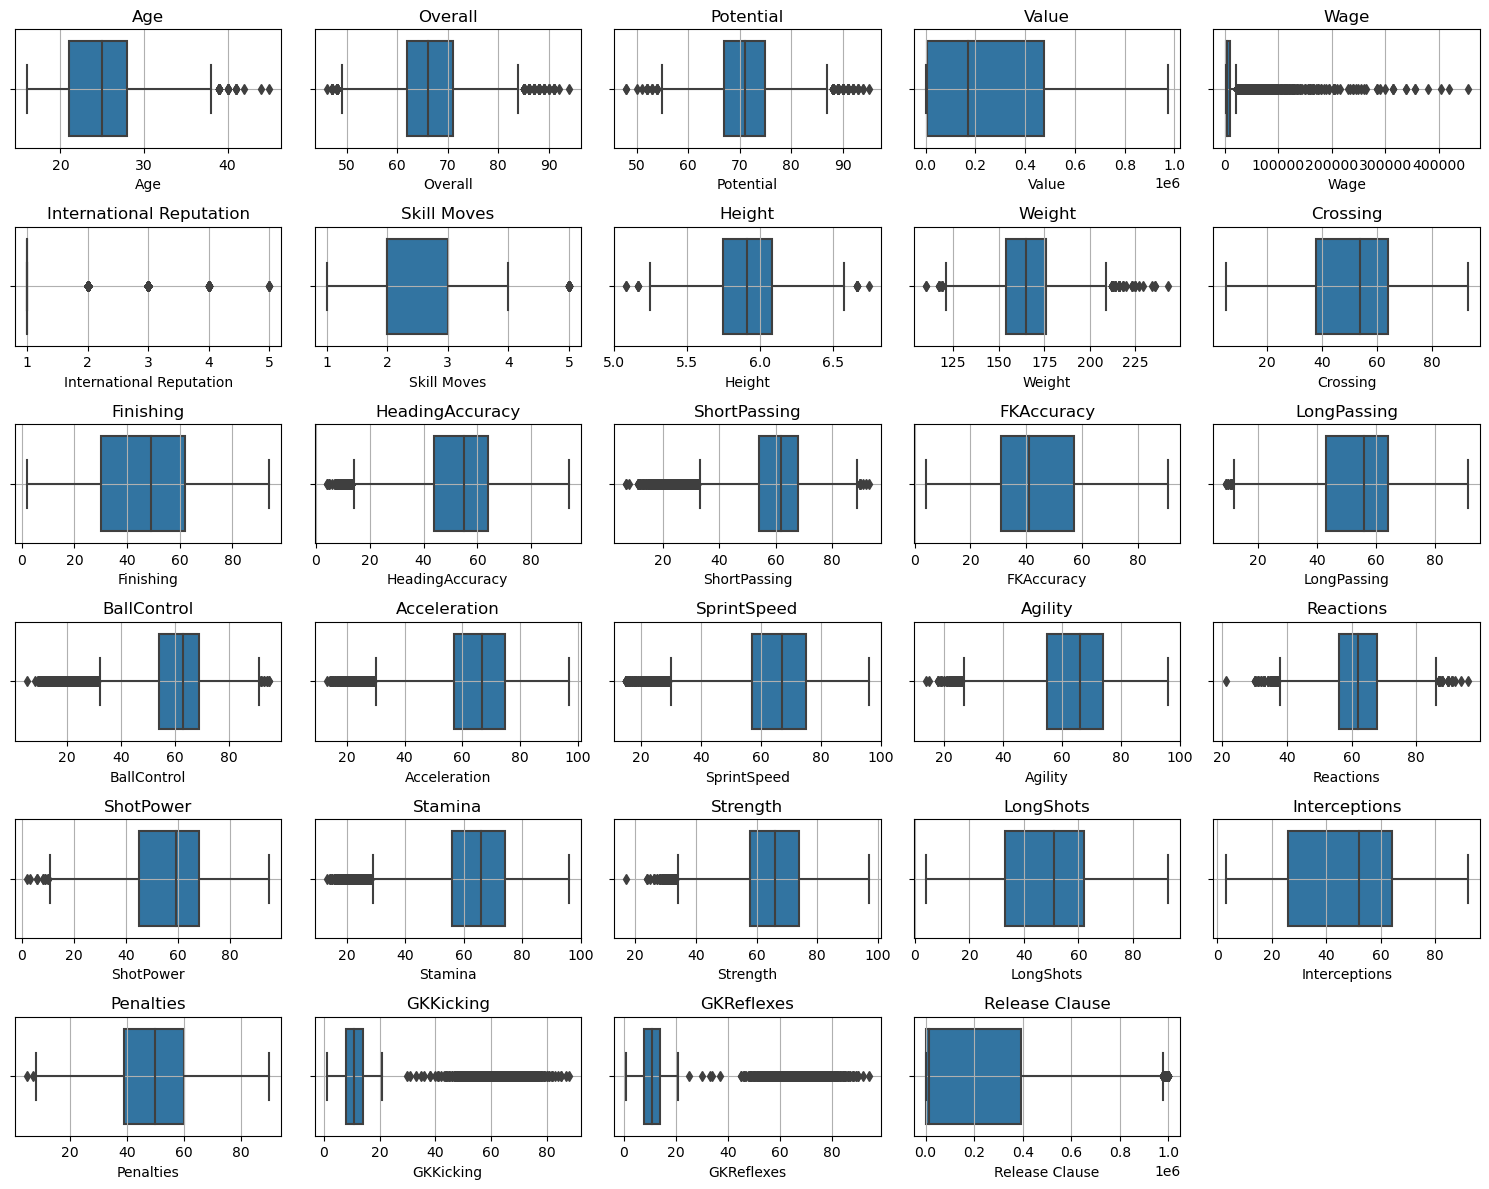

In [275]:
row = 6
col = 5
iterator = 1
plt.figure(figsize=(15,12))
for i in num_cols:
    plt.subplot(row,col,iterator)
    sns.boxplot(fifa.loc[:,i])
    plt.title(i)
    plt.grid()
    iterator += 1
plt.tight_layout()
plt.show()

**7. find out If there is any player above 2.0*IQR – Q1 and below 2.0*IQR + Q3. What 
would happen if the data has above or below the mentioned values and display the 
names of the players?**


In [276]:
q1 = fifa.quantile(0.25)
q3 = fifa.quantile(0.75)
iqr = q3-q1

ll = (2.0*iqr)-q1
ul = (2.0*iqr)+q3

In [277]:
fifa.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,ShotPower,Stamina,Strength,LongShots,Interceptions,Positioning,Penalties,GKKicking,GKReflexes,Release Clause
0,240331,P. Camará,21,Guinea Bissau,58,69,Crawley Town,220000.0,1000.0,Right,...,58.0,58.0,62.0,56.0,13.0,55.0,58.0,9.0,15.0,429000.0
1,183465,J. Rodwell,27,England,68,68,Blackburn Rovers,925000.0,16000.0,Right,...,72.0,51.0,71.0,70.0,68.0,67.0,57.0,15.0,12.0,1800.0
2,205186,P. Gazzaniga,26,Argentina,74,78,Tottenham Hotspur,5000.0,46000.0,Right,...,49.0,45.0,67.0,19.0,16.0,13.0,41.0,84.0,76.0,9600.0
3,233531,Y. Soteldo,21,Venezuela,71,81,Universidad de Chile,3800.0,6000.0,Right,...,60.0,60.0,30.0,66.0,24.0,65.0,71.0,9.0,6.0,6100.0
4,243718,R. Koot,18,Netherlands,56,68,Fortuna Sittard,120000.0,1000.0,Right,...,17.0,20.0,45.0,5.0,11.0,4.0,15.0,59.0,56.0,198000.0


In [278]:
df = fifa[((fifa>ll)|(fifa<ul)).any(axis=1)]
df.shape

(13657, 42)

In [ ]:
# There are 13657 players above 2.0*IQR – Q1 and below 2.0*IQR + Q3.

**8. Check the Categorical variables and Find if there is any data imbalance in any column 
also find if any cardinality problem exists.**

In [279]:
cat_cols = fifa.select_dtypes(include='object').columns
cat_cols

Index(['ID', 'Name', 'Nationality', 'Club', 'Preferred Foot', 'Work Rate',
       'Body Type', 'Position', 'Jersey Number', 'Joined', 'Loaned From',
       'Contract Valid Until', 'Positioning'],
      dtype='object')

In [284]:
cat_new = ['Nationality','Club','Preferred Foot', 'Work Rate', 'Body Type',
       'Position', 'Loaned From', 'Joined','Contract Valid Until']
len(cat_new)

9

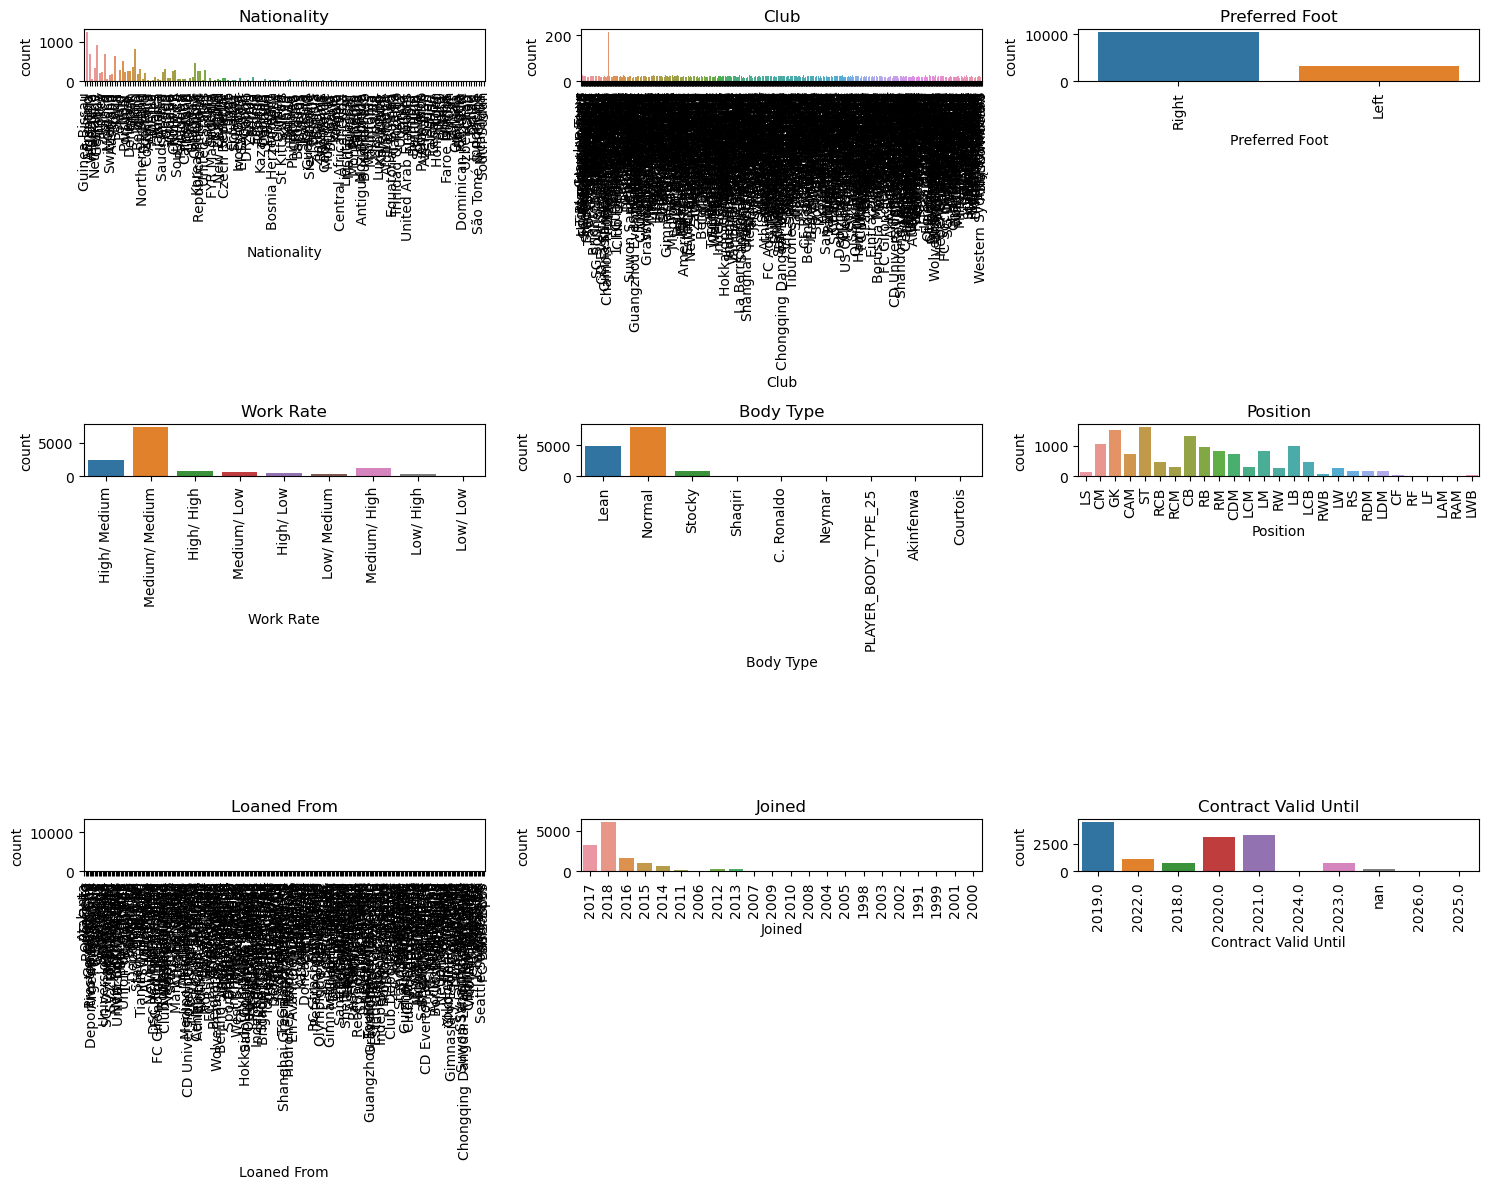

In [285]:
row =3
col =3
it=1
plt.figure(figsize=(15,12))
for i in cat_new:
    plt.subplot(row,col,it)
    sns.countplot(fifa.loc[:,i])
    plt.title(i)
    plt.xticks(rotation=90)
    it+=1
plt.tight_layout()
plt.show()

In [282]:
cat_new_1 = ['Preferred Foot', 'Work Rate', 'Body Type',
       'Position', 'Joined']
len(cat_new_1)

5

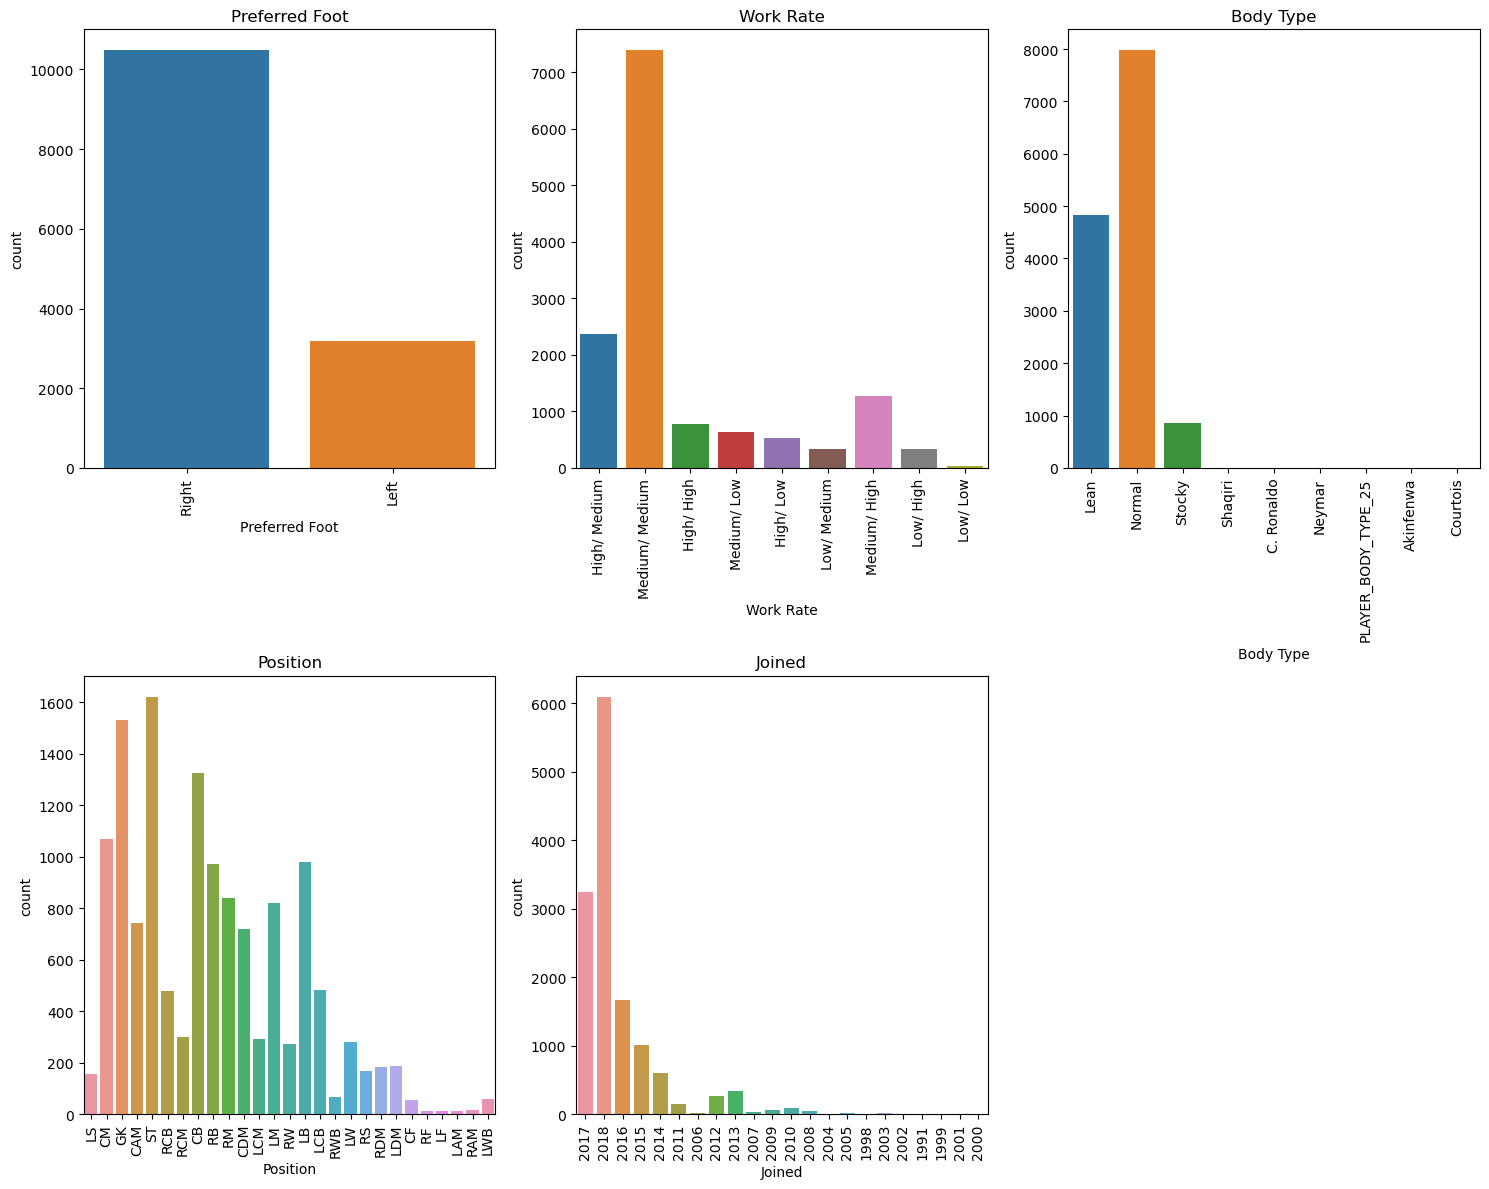

In [283]:
row =2
col =3
it=1
plt.figure(figsize=(15,12))
for i in cat_new_1:
    plt.subplot(row,col,it)
    sns.countplot(fifa.loc[:,i])
    plt.title(i)
    plt.xticks(rotation=90)
    it+=1
plt.tight_layout()
plt.show()

In [ ]:
# The column "Loaned From","Club" and "Nationality" has many unique values and are creating imbalance in the data

**9. Generate pair plots for the following variables:
Overall, Value, Wage, International Reputation, Height, Weight, Release Clause**

In [286]:
pair = fifa[['Overall', 'Value', 'Wage', 'International Reputation', 'Height', 'Weight', 'Release Clause']]
pair

,Overall,Value,Wage,International Reputation,Height,Weight,Release Clause
0,58,220000.0,1000.0,1.0,6.083,161.0,429000.0
1,68,925000.0,16000.0,2.0,6.166,172.0,1800.0
2,74,5000.0,46000.0,1.0,6.415,198.0,9600.0
3,71,3800.0,6000.0,1.0,5.249,121.0,6100.0
4,56,120000.0,1000.0,1.0,6.083,176.0,198000.0
...,...,...,...,...,...,...,...
25461,62,425000.0,2000.0,1.0,5.747,143.0,829000.0
25470,54,150000.0,1000.0,1.0,5.747,154.0,379000.0
25477,68,650000.0,7000.0,1.0,5.747,148.0,1300.0
25482,63,350000.0,1000.0,1.0,6.000,159.0,438000.0


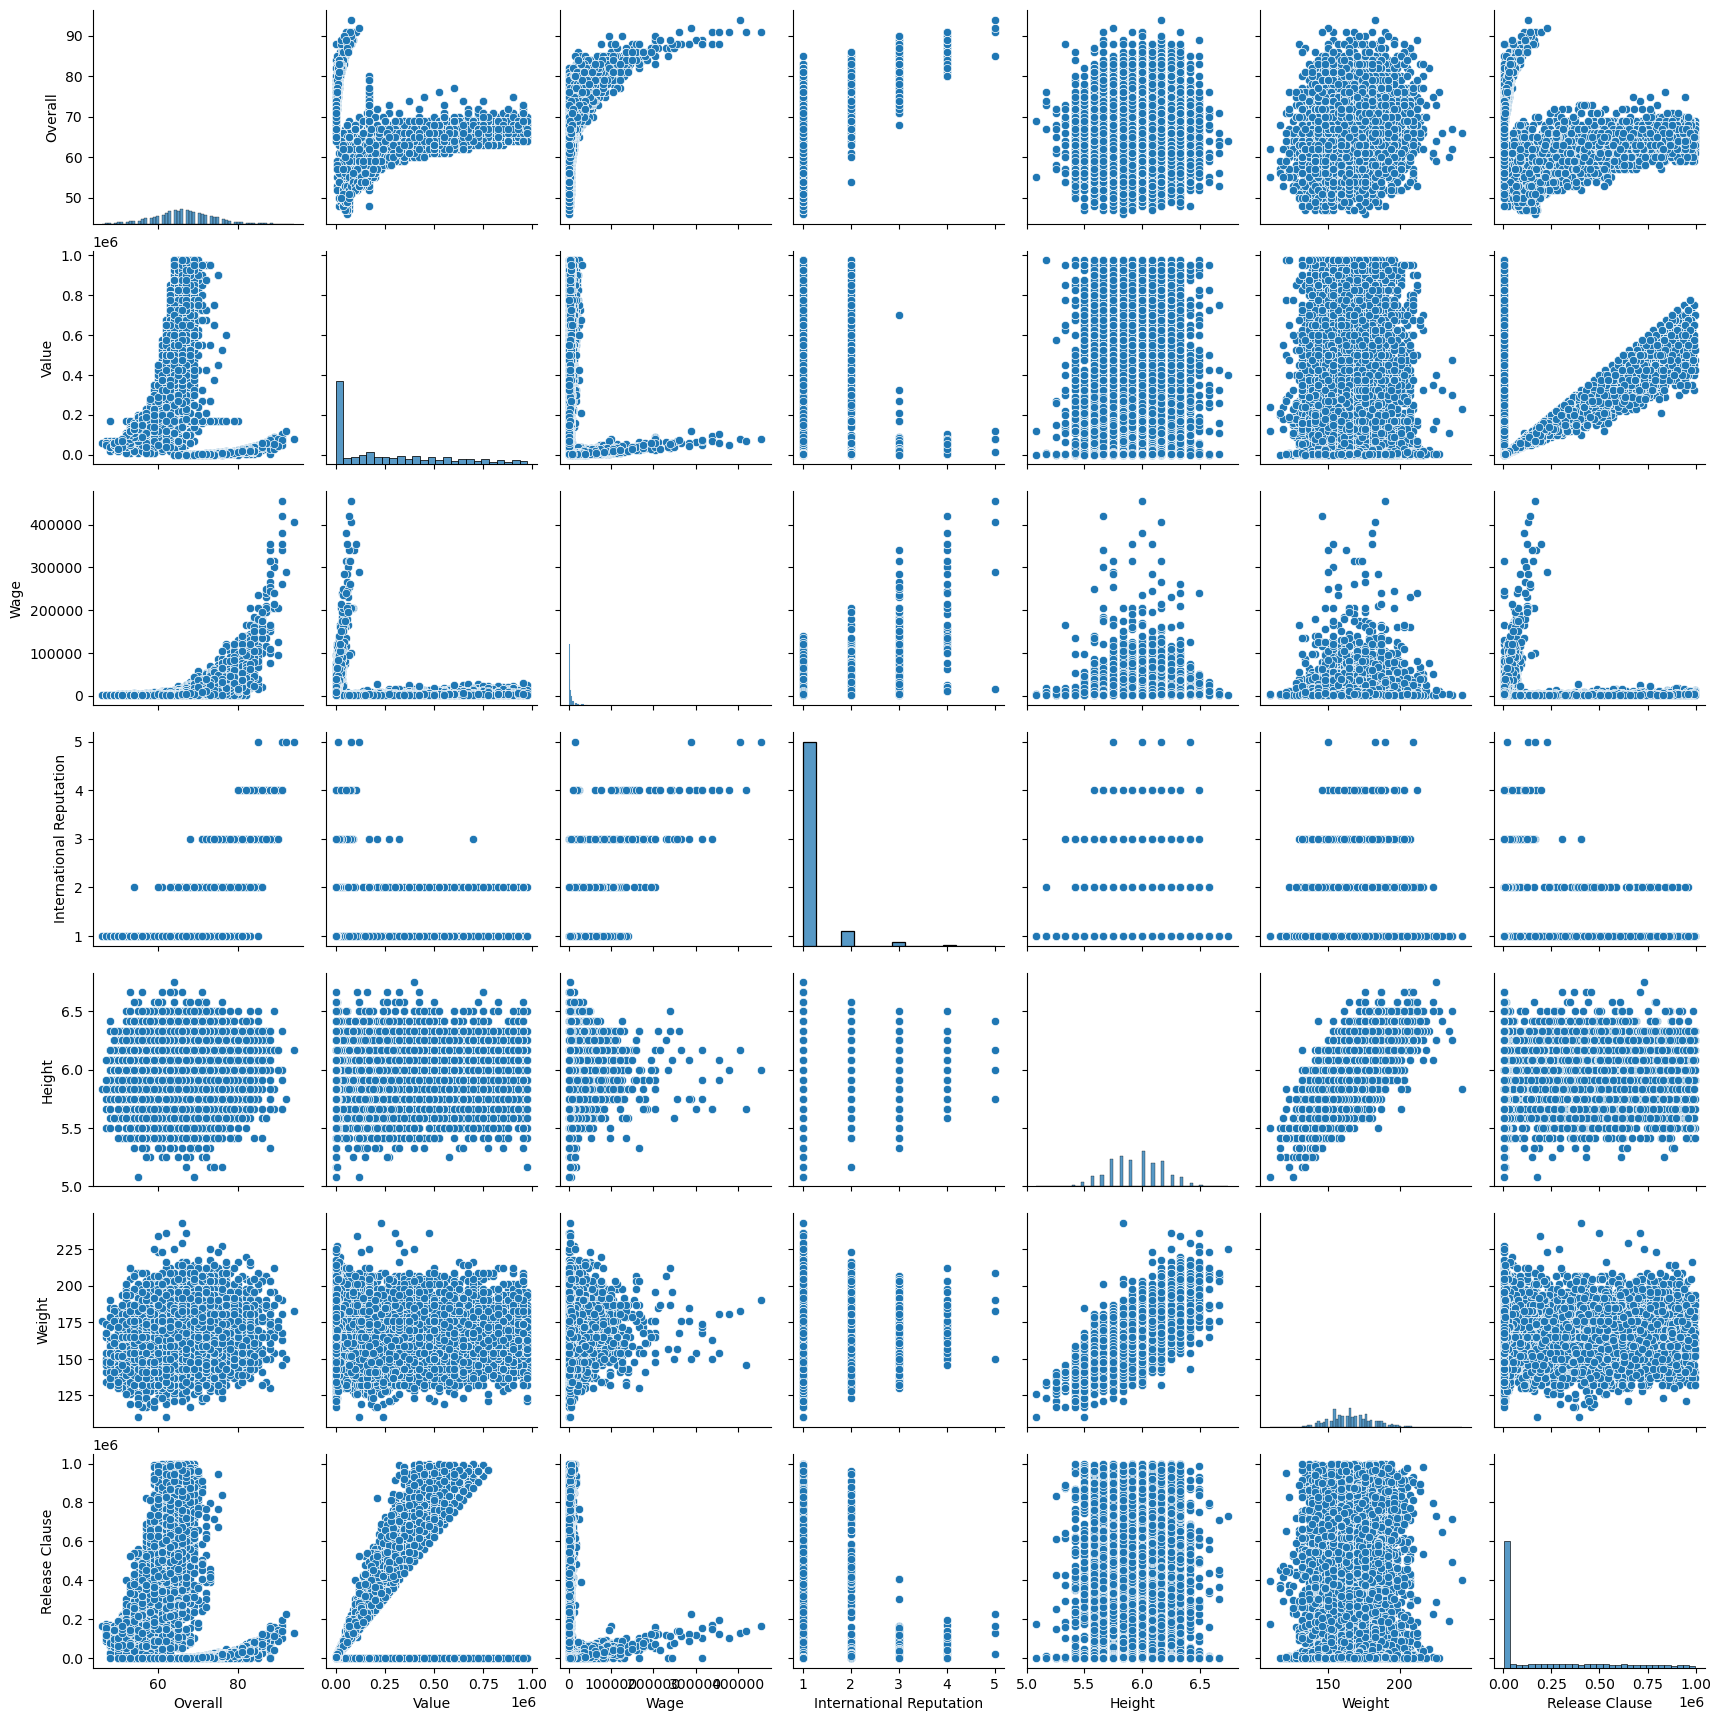

In [287]:
# Ploting the pairplot
sns.pairplot(pair)
plt.grid()
plt.show()

**10. Generate a table containing the top 20 players ranked by Overall score and whose 
contract expires in 2020.**

In [292]:
fifa['Contract Valid Until'].unique()

array(['2019.0', '2022.0', '2018.0', '2020.0', '2021.0', '2024.0',
       '2023.0', 'nan', '2026.0', '2025.0'], dtype=object)

In [297]:
new_fifa = fifa[(fifa['Contract Valid Until']=='2020.0')].sort_values(by='Overall',ascending=False).head(20)
new_fifa

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,ShotPower,Stamina,Strength,LongShots,Interceptions,Positioning,Penalties,GKKicking,GKReflexes,Release Clause
15989,155862,Sergio Ramos,32,Spain,91,91,Real Madrid,51000.0,380000.0,Right,...,79.0,84.0,83.0,59.0,90.0,60.0,75.0,9.0,11.0,104600.0
6869,177003,L. Modrić,32,Croatia,91,91,Real Madrid,67000.0,420000.0,Right,...,79.0,89.0,58.0,82.0,83.0,79.0,82.0,7.0,9.0,137400.0
20448,193080,De Gea,27,Spain,91,93,Manchester United,72000.0,260000.0,Right,...,31.0,43.0,64.0,12.0,30.0,12.0,40.0,87.0,94.0,138600.0
963,183277,E. Hazard,27,Belgium,91,91,Chelsea,93000.0,340000.0,Right,...,82.0,83.0,66.0,80.0,41.0,87.0,86.0,6.0,8.0,172100.0
20440,138956,G. Chiellini,33,Italy,89,89,Juventus,27000.0,215000.0,Left,...,78.0,65.0,89.0,49.0,88.0,28.0,50.0,2.0,3.0,44600.0
13954,164240,Thiago Silva,33,Brazil,88,88,Paris Saint-Germain,24000.0,165000.0,Right,...,71.0,74.0,82.0,68.0,89.0,59.0,60.0,5.0,10.0,44400.0
5874,190460,C. Eriksen,26,Denmark,88,91,Tottenham Hotspur,73500.0,205000.0,Right,...,84.0,92.0,58.0,89.0,56.0,83.0,67.0,7.0,6.0,141500.0
9293,175943,D. Mertens,31,Belgium,87,87,Napoli,45000.0,135000.0,Right,...,80.0,75.0,42.0,81.0,36.0,87.0,79.0,8.0,4.0,76500.0
8867,189332,Jordi Alba,29,Spain,87,87,FC Barcelona,38000.0,250000.0,Left,...,64.0,91.0,61.0,66.0,84.0,79.0,59.0,13.0,13.0,77900.0
13876,193041,K. Navas,31,Costa Rica,87,87,Real Madrid,30500.0,195000.0,Right,...,21.0,39.0,75.0,13.0,20.0,16.0,25.0,75.0,90.0,62500.0


**1. What would the average wage for this set of players be?**

In [301]:
print('Average Wage for this set of players is',new_fifa['Wage'].mean(),'euros')

Average Wage for this set of players is 181050.0 euros


**2. What is the average age?**

In [304]:
print('Average Age for this set of players is',new_fifa['Age'].mean(),'years')

Average Age for this set of players is 30.25 years


**3. Is there a correlation between the Overall rating and Value for these players? If Yes 
what kind of relationship that the features have, also explain why this kind of relationship 
could happen.**

In [305]:
print('Correlation between the Overall rating and Value for these players is',new_fifa['Overall'].corr(new_fifa['Value']))

Correlation between the Overall rating and Value for these players is 0.7655219227807245


**11. Generate tables containing the top 5 players by Overall rating for each unique position.**

In [371]:
top_5=pd.pivot_table(df,index=['Position','Name'],values=['Overall'])
top_5

Overall
Position Name                 
CAM      A. Adouyev       62.0
         A. Ajagun        69.0
         A. Aktas         54.0
         A. Al Nazera     62.0
         A. Al Nemer      63.0
...                        ...
ST       Zhou Liao        59.0
         Zhu Jianrong     64.0
         Álvaro           72.0
         Ángel            79.0
         Éder             75.0

[13594 rows x 1 columns]

In [372]:
top_5 = top_5.sort_values(by = 'Overall',ascending = False).head(5)
top_5

,,Overall
Position,Name,
ST,Cristiano Ronaldo,94.0
LW,Neymar Jr,92.0
RCB,Sergio Ramos,91.0
LF,E. Hazard,91.0
RCM,K. De Bruyne,91.0


**1. Are there any players appearing at more than one table? Please point out such players.**

In [ ]:
#for i in df_top20['Name']:
 #   for j in top_5.loc['Name']:
  #      if i == j:
   #         print(j)

In [ ]:
# the Player E.Hazard comes in two tables.

**2. What is the average wage one can expect to pay for the top 5 in every position?**

In [373]:
df.groupby('Position')['Wage'].apply(lambda x: x.nlargest(5).mean())

Position
CAM    180000.0
CB     155000.0
CDM    194600.0
CF      49000.0
CM     150000.0
GK     196000.0
LAM     82600.0
LB     189000.0
LCB    166000.0
LCM    132000.0
LDM    120800.0
LF     123200.0
LM     157000.0
LS     121400.0
LW     261000.0
LWB     36600.0
RAM     48400.0
RB     153000.0
RCB    219000.0
RCM    222800.0
RDM    105600.0
RF      41800.0
RM     152000.0
RS     154600.0
RW     181000.0
RWB     46400.0
ST     299000.0
Name: Wage, dtype: float64

### Statistical Analysis:

**1. Test statistically whether the Left-hand player’s overall rating is higher than the
Right-hand overall score. Alpha = 0.05
Before checking the test, Kindly make sure data is normally distributed**

In [327]:
fifa.groupby('Preferred Foot')['Overall'].count()

Preferred Foot
Left      3174
Right    10483
Name: Overall, dtype: int64

In [328]:
left = fifa[fifa['Preferred Foot']=='Left']['Overall']
a=left.values
len(a)

3174

In [329]:
right = fifa[fifa['Preferred Foot']=='Right']['Overall']
b=right.values
len(b)

10483

In [330]:
# H0: mu_left <= mu_right   
# H1: mu_left > mu_right

In [332]:
n1=len(a)
n2=len(b)
alpha=0.05
m1=a.mean()
m2=b.mean()
z_critical=stats.norm.isf(alpha)
z_critical

1.6448536269514729

In [333]:
sd1 = a.std()
sd2 = b.std()
sp = np.sqrt(((n1-1)*sd1**2 + (n2-1)*sd2**2)/(n1+n2-2))
z_stat = (m1-m2)/(sp*np.sqrt((1/n1)+(1/n2)))
z_stat

4.819037873634521

In [ ]:
# since test statistics(z_stat) value is beyond z_critical value we reject null hypothesis (accept H1)
# thus we conclude that Left-hand player’s overall rating is higher than the Right-hand overall score

**2. Does the age factor affect the player’s potential? Check the claim that the players who 
are greater than 35, their potential will be lesser than those whose age is less than 35. 
Alpha = 0.05**

In [343]:
df_a1 = df[(df['Age']>=35)]['Potential']
df_a2 = df[(df['Age']<35)]['Potential']

n1 = len(df_a1)                 #df_a1 players potential greater than 35
n2 = len(df_a2)                 #df_a2 stands fro players potentail less than 35

print('No of players potential greater than eqaul to age 35',n1)
print('No of players potential less than age 35',n2)

No of players potential greater than eqaul to age 35 346
No of players potential less than age 35 13311


In [ ]:
##step1 :
#H0 : mu1-mu2 >= 0       
#H1 : mu1 -mu2 < 0

In [344]:
## step 2
#checking for normality
stats.shapiro(df['Potential'])

ShapiroResult(statistic=0.9933071136474609, pvalue=1.190773703517539e-24)

* p_value is lesseer than the alpha  so the data is not nornal

In [345]:
alpha = 0.05
stat,p_value = stats.mannwhitneyu(x = df_a1,y = df_a2,alternative = 'less')
print('The P_value is ',p_value)

The P_value is  1.115069496276631e-20


In [347]:
 #step 4
 'We Reject the Null Hypothesis H0' if p_value < alpha else 'We fail to Reject the Null Hypothesis H0'

'We Reject the Null Hypothesis H0'

In [ ]:
#that the players who are greater than 35, their potential will be lesser than those whose age is less than 35

**3. Use the statistical test to check the relationship between the Preferred Foot and Position 
with the 99% confident interval**

In [350]:
a=pd.crosstab(fifa['Preferred Foot'],fifa['Position'])
a

Position,CAM,CB,CDM,CF,CM,GK,LAM,LB,LCB,LCM,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
Preferred Foot,,,,,,,,,,,,,,,,,,,,,
Left,202,253,99,11,195,159,7,863,198,75,...,10,26,30,19,3,189,29,74,2,210
Right,540,1074,622,43,874,1372,7,115,286,216,...,963,452,269,164,9,650,137,200,63,1412


In [ ]:
#step1 :
#H0 : There is a relation between preferred foot and postion
#H0 : there is no relation between preferred foor and position

In [351]:
#step2 :
#performing chi-square test.
chi2, p, dof, expected = stats.chi2_contingency(a)

In [352]:
#step3
alpha = 0.01
critical_value = stats.chi2.ppf(1-alpha, dof)

# Print the results
print("Chi-squared test statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:", expected)
print("Critical value:", critical_value)

Chi-squared test statistic: 3394.5278485109557
P-value: 0.0
Degrees of freedom: 26
Expected frequencies: [[ 172.44695028  308.40579922  167.56637622   12.55004759  248.44446072
   355.81709014    3.25371604  227.29530644  112.48561177   67.63081204
    43.92516658    3.02130775  190.8072051    36.02328476   65.07432086
    13.94449733    3.95094091  226.13326499  111.09116204   69.49007835
    42.53071685    2.78889947  194.99055429   38.57977594   63.67987113
    15.10653877  376.96624442]
 [ 569.55304972 1018.59420078  553.43362378   41.44995241  820.55553928
  1175.18290986   10.74628396  750.70469356  371.51438823  223.36918796
   145.07483342    9.97869225  630.1927949   118.97671524  214.92567914
    46.05550267   13.04905909  746.86673501  366.90883796  229.50992165
   140.46928315    9.21110053  644.00944571  127.42022406  210.32012887
    49.89346123 1245.03375558]]
Critical value: 45.64168266628317


In [353]:
# step4:
if chi2 > critical_value:
    print("Reject the null hypothesis, there is a significant relationship between Preferred Foot and Position")
else:
    print("Fail to reject the null hypothesis, there is no significant relationship between Preferred Foot and Position")

Reject the null hypothesis, there is a significant relationship between Preferred Foot and Position


**4. Does the International Reputation cause a significant effect on players' Wages?
Check the claim with a 0.04 significance level. Check the Normality of data before the 
actual test.**

In [354]:
df['International Reputation'].value_counts()

1.0    12464
2.0      928
3.0      224
4.0       37
5.0        4
Name: International Reputation, dtype: int64

In [340]:
alpha = 0.04
s_stat,p_value = stats.shapiro(fifa['Wage'])
print('test statistic',s_stat)
print('p_value',p_value)

test statistic 0.38547104597091675
p_value 0.0


In [ ]:
# since p_value is < alpha(0.04) we reject null hypothesis (accept alternative hypothesis)
# hence we conclude data is not normally distributed

In [ ]:
#step2 
#H0 : there is a significant effect on players Wage cause by Ineternational Reputation
#H1 : there is a no significant effect on players Wage cause by Ineternational Reputation

In [355]:
a= df[(df['International Reputation']==1.0)]['Wage']
b= df[(df['International Reputation']==2.0)]['Wage']
c= df[(df['International Reputation']==3.0)]['Wage']
d= df[(df['International Reputation']==4.0)]['Wage']
e= df[(df['International Reputation']==5.0)]['Wage']

In [356]:
#step3 
#test statistic

alpha = 0.04
stat,p_value = stats.f_oneway(a,b,c,d,e)
print('The test_statistic is',stat)
print('The p_value is',p_value)

The test_statistic is 3490.6615088764024
The p_value is 0.0


In [357]:
#step 4
'We Reject the Null Hypothesis H0' if p_value < alpha else 'We fail to Reject the Null Hypothesis H0'

'We Reject the Null Hypothesis H0'

In [ ]:
#therefore "there is a no significant effect on players Wage cause by Ineternational Reputation"

**5. Check the claim that the median wages of under top 20 players are lesser than or equal 
to 25000. Test the claim with a 0.05 % significance level. Check the data is normally 
distributed or not before the testing the claim statistically**

In [367]:
#step1
#H0 mu <= 25000
#H1 mu>25000

alpha = 0.05
mu = 25000
n = len(new_fifa['Wage'])

In [368]:
#step2 :
#checking the normality of the data 

stats.shapiro(new_fifa['Wage'])

ShapiroResult(statistic=0.9419571161270142, pvalue=0.26102936267852783)

* #the p_value is greater than the alpha so the data is normal.

In [369]:
#step 3:
stat,p_value = stats.ttest_1samp(a = new_fifa['Wage'],popmean = 25000,alternative = 'greater')
print('The test_statistic is ',stat)
print('The p_value is ',p_value)

The test_statistic is  6.4939746361365565
The p_value is  1.5981218601189906e-06


In [370]:
#step 4
'We Reject the Null Hypothesis H0' if p_value < alpha else 'We fail to Reject the Null Hypothesis H0'

'We Reject the Null Hypothesis H0'